# <center> **Project Milestone 3 - TeamDream** </center>

In [2]:
import sys
!{sys.executable} -m pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from statsmodels.stats import diagnostic
from scipy import stats

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

import os

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn import linear_model

import statsmodels.api as sm
from scipy import stats

from wordcloud import WordCloud
from collections import Counter
from PIL import Image

In [4]:
#Add state code 
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <center> We're a consulting firm for new breweries. Breweries give us their reviews and ask us to design their marketing campaign. </center>

# **Introduction** 

We are a consulting firm that specializes in helping breweries succeed through the use of data analytics. Our team has expertise in the brewery industry and utilizes a wide range of data sources to provide our clients with informed and strategic advice.

Our client, Sam Smith, recently graduated from college in Massachusetts and is interested in starting a brewery. He has noticed that local breweries are now trendy and wants to create a local vibe for his beer. He has already taken the first steps towards this goal by creating some sample beers and seeking feedback from his family and friends. However, he has received differing opinions on the quality and potential success of his brews, leaving him unsure of how to move forward. Seeking a more objective perspective, Sam has decided to turn to our consulting service for guidance.

To help Sam, we will use data from Rate Beer and Beer Advocate, two websites that have been collecting beer ratings from millions of users for over 15 years. These websites are considered reliable sources of information for beer consumers and are widely used for beer reviews. By analyzing this data, we will be able to understand the needs and preferences of beer drinkers, which will guide Sam in developing a successful brewery.

To help Sam create a successful brewery, we will follow a few steps. First, we will conduct a general market research on the beer industry in the United States. This will involve examining data on where consumers come from (by state), the evolution of the number of breweries over time, and trends in consumer behavior.

Once we have a good understanding of the overall market, we will focus on identifying the most promising states for Sam's brewery to operate in. We will consider factors such as the size of the market, the level of competition, and the popularity of local breweries in each state. Our goal is to identify states that have a large market share, low competition, and a strong preference for local breweries.

After identifying a few states that meet these criteria, we will select one of them to focus on in more depth. We will examine the breweries and stats in this state to understand the competition and identify opportunities for Sam's brewery to stand out and succeed.

At this stage, we will also consider the feedback Sam has received from his family on his sample beers. We will use the business intelligence we have gathered thus far to evaluate this feedback and make recommendations for improvements to Sam's products. We may also suggest new products that we believe have the potential to perform well in the chosen state and fit with Sam's goal of creating a local vibe for his beer. Our goal is to help Sam create a successful brewery that meets the needs and preferences of local beer drinkers.



## **Data preprocessing**

During this step, we will **pre-process all the csv files** and **extract all the informations** needed for our project.

In [6]:
# Load files

# Ratings overview (with informations extracted from the files ratings.txt)
ratings_overview_rb = pd.read_csv('/content/drive/MyDrive/data/RateBeer/ratings_overview_rb.csv', delimiter=',')
ratings_overview_ba = pd.read_csv('/content/drive/MyDrive/data/BeerAdvocate/ratings_overview_ba.csv', delimiter=',')

# Users
users_rb = pd.read_csv('/content/drive/MyDrive/data/RateBeer/users_rb.csv', delimiter=',')
users_ba = pd.read_csv('/content/drive/MyDrive/data/BeerAdvocate/users_ba.csv', delimiter=',')

# Beers
beers_rb = pd.read_csv('/content/drive/MyDrive/data/RateBeer/beers_rb.csv', delimiter=',')
beers_ba = pd.read_csv('/content/drive/MyDrive/data/BeerAdvocate/beers_ba.csv', delimiter=',')

# Breweries
breweries_rb = pd.read_csv('/content/drive/MyDrive/data/RateBeer/breweries_rb.csv', delimiter=',')
breweries_ba = pd.read_csv('/content/drive/MyDrive/data/BeerAdvocate/breweries_ba.csv', delimiter=',')

In [7]:
# Define the color associated with our project
shade1 = '#fccc1c'
shade2 = '#ddb318'
shade3 = '#bd9915'
shade4 = '#9e8011'
shade5 = '#7e660e'
shade6 = '#5f4d0a'
shade7 = '#3f3307'
shade8 = '#201a03'

rb_color = shade1
ba_color = shade4

blue = '#7ed6df'
light_blue = '#c7ecee'
dark_plue = '#30336b'
red = '#ff7979'
orange = '#ffbe76'
purple = '#e056fd'
green = '#badc58'


### **1. Retrieve informations from the ratings.txt file**

In order to get information about each rating on Beer Advocate and Rate Beer, we will extract the following features from the files `ratings_ba.txt` and `ratings_rb.txt` : 

*   Beer Id
*   Date of rating 
*   Rating
*   Appearance, aroma, palate, taste, overall

In [8]:
def extract_ids_dates_ratings(file_folder, nb_iters_start, nb_iters_stop):
    """
    To extract the beer_id and the date from the file ratings.txt. 
    First, do not forget to run 'split -l 500000 -d --additional-suffix=.txt $FileName ratings.txt'

    Args : 
    file_folder : name of the folder you have your splitted files
    nb_iters_start : number of the first splitted file you want to extract
    nb_iters_stop : number of the last splitted file you want to extract

    Returns : 
    beer_ids : list of the beer_ids extracted 
    beer_dates : list of the dates of the ratings extracted
    """
    beer_ids = []
    beer_dates = []
    user_ids = []
    appearance = []
    aroma = []
    palate = []
    taste = []
    overall = []
    rating = []

    for i in range(nb_iters_start, nb_iters_stop) :
        if i < 10 :
            name = file_folder + '/x0' + str(i) +'.txt'
        else : 
            name = file_folder + '/x' + str(i) +'.txt'

        fic = open(name, mode='r', encoding='utf-8')
        for line in fic : 
            if line.startswith('beer_id') :
                split = line.split()
                beer_ids.append(split[1])

            if line.startswith('date') :
                split = line.split()
                beer_dates.append(split[1])

            if line.startswith('user_id') : 
                split = line.split()
                user_ids.append(split[1])

            if line.startswith('appearance') : 
                split = line.split()
                appearance.append(split[1])

            if line.startswith('aroma') : 
                split = line.split()
                aroma.append(split[1])

            if line.startswith('palate') : 
                split = line.split()
                palate.append(split[1])

            if line.startswith('taste') : 
                split = line.split()
                taste.append(split[1])

            if line.startswith('overall') : 
                split = line.split()
                overall.append(split[1])

            if line.startswith('rating') : 
                split = line.split()
                rating.append(split[1])

        fic.close()
        os.remove(name)
    return beer_ids, beer_dates, user_ids, appearance, aroma, palate, taste, overall, rating

The databases are already created and you **don't need to run the following cells**. You can find them at the following location :   


*   /content/drive/MyDrive/data/BeerAdvocate/ratings_overview_ba.csv
*  /content/drive/MyDrive/data/RateBeer/ratings_overview_rb.csv



In [9]:
#For RateBeer
#Run the following lines to create the database and save it to csv.
"""!split -l 500000 -d --additional-suffix=.txt $FileName /content/drive/MyDrive/data/RateBeer/ratings_rb.txt
file_folder = '/content/'
beer_ids, beer_dates, user_ids, appearance, aroma, palate, taste, overall, rating = extract_ids_dates_ratings(file_folder, 0, 90)
beer_ids2, beer_dates2, user_ids2, appearance2, aroma2, palate2, taste2, overall2, rating2 = extract_ids_dates_ratings(file_folder, 9000, 9153)

ratings_data_rb = pd.DataFrame({
                            'beer_id' : beer_ids + beer_ids2,
                            'dates' : beer_dates + beer_dates2,
                            'user_ids' :user_ids + user_ids2,
                            'appearance' : appearance + appearance2,
                            'aroma' : aroma + aroma2, 
                            'palate' : palate + palate2, 
                            'taste' : taste + taste2, 
                            'overall' : overall + overall2, 
                            'rating' : rating + rating2
                            })

ratings_data_rb['dates'] = pd.to_datetime(ratings_data_rb['dates'],unit='s')
ratings_data_rb.to_csv('/content/drive/MyDrive/data/RateBeer/ratings_overview_rb.csv', index=False)"""

"!split -l 500000 -d --additional-suffix=.txt $FileName /content/drive/MyDrive/data/RateBeer/ratings_rb.txt\nfile_folder = '/content/'\nbeer_ids, beer_dates, user_ids, appearance, aroma, palate, taste, overall, rating = extract_ids_dates_ratings(file_folder, 0, 90)\nbeer_ids2, beer_dates2, user_ids2, appearance2, aroma2, palate2, taste2, overall2, rating2 = extract_ids_dates_ratings(file_folder, 9000, 9153)\n\nratings_data_rb = pd.DataFrame({\n                            'beer_id' : beer_ids + beer_ids2,\n                            'dates' : beer_dates + beer_dates2,\n                            'user_ids' :user_ids + user_ids2,\n                            'appearance' : appearance + appearance2,\n                            'aroma' : aroma + aroma2, \n                            'palate' : palate + palate2, \n                            'taste' : taste + taste2, \n                            'overall' : overall + overall2, \n                            'rating' : rating + rating2\n 

In [10]:
#For Beer Advocate
#Run the following lines to create the database and save it to csv.
"""!split -l 500000 -d --additional-suffix=.txt $FileName /content/drive/MyDrive/data/BeerAdvocate/ratings_ba.txt
file_folder = '/content/'
beer_ids, beer_dates, user_ids, appearance, aroma, palate, taste, overall, rating = extract_ids_dates_ratings(file_folder, 0, 90)
beer_ids2, beer_dates2, user_ids2, appearance2, aroma2, palate2, taste2, overall2, rating2 = extract_ids_dates_ratings(file_folder, 9000, 9213)

ratings_data_rb = pd.DataFrame({
                            'beer_id' : beer_ids + beer_ids2,
                            'dates' : beer_dates + beer_dates2,
                            'user_ids' :user_ids + user_ids2,
                            'appearance' : appearance + appearance2,
                            'aroma' : aroma + aroma2, 
                            'palate' : palate + palate2, 
                            'taste' : taste + taste2, 
                            'overall' : overall + overall2, 
                            'rating' : rating + rating2
                            })

ratings_data_rb['dates'] = pd.to_datetime(ratings_data_rb['dates'],unit='s')
ratings_data_rb.to_csv('/content/drive/MyDrive/data/BeerAdvocate/ratings_overview_ba.csv', index=False)"""

"!split -l 500000 -d --additional-suffix=.txt $FileName /content/drive/MyDrive/data/BeerAdvocate/ratings_ba.txt\nfile_folder = '/content/'\nbeer_ids, beer_dates, user_ids, appearance, aroma, palate, taste, overall, rating = extract_ids_dates_ratings(file_folder, 0, 90)\nbeer_ids2, beer_dates2, user_ids2, appearance2, aroma2, palate2, taste2, overall2, rating2 = extract_ids_dates_ratings(file_folder, 9000, 9213)\n\nratings_data_rb = pd.DataFrame({\n                            'beer_id' : beer_ids + beer_ids2,\n                            'dates' : beer_dates + beer_dates2,\n                            'user_ids' :user_ids + user_ids2,\n                            'appearance' : appearance + appearance2,\n                            'aroma' : aroma + aroma2, \n                            'palate' : palate + palate2, \n                            'taste' : taste + taste2, \n                            'overall' : overall + overall2, \n                            'rating' : rating + rating

### **2. Extract the user_id for Beer Advocate** 

In BeerAdvocate's ratings and users datasets, the `user_id` is a string composed of the `user_name` and the `user_id` in the following format : "user_name.user_id". 
<br>Therefore, we will split the column to **extract the user_id**.
<br>*Note: we do not need to keep the user_name column because that information is already contained in the users dataset.

In [11]:
ratings_overview_ba.head()

,beer_id,dates,user_ids,appearance,aroma,palate,taste,overall,rating
0,142544,2015-08-20 10:00:00,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88
1,19590,2009-02-20 11:00:00,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67
2,19590,2006-03-13 11:00:00,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73
3,19590,2004-12-01 11:00:00,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98
4,19590,2004-08-30 10:00:00,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00


In [12]:
ratings_overview_ba['user_ids'].head()

0           nmann08.184925
1       stjamesgate.163714
2            mdagnew.19527
3    helloloser12345.10867
4          cypressbob.3708
Name: user_ids, dtype: object

Unfortunately, some ratings **only contain the user_name**.

In [13]:
# Extracting the user_id from BeerAdvocate's ratings
N, D = ratings_overview_ba.shape
str_users_id = ratings_overview_ba['user_ids'].astype(str)
new_users_id = list()
missing_id = dict()

print("Line num: user_id --> split user_id")

for i in range(N):
    r = str_users_id[i]
    r_split = r.split('.')
    
    # Print and Store the missing values
    if len(r_split) < 2 or r_split[1] == '':
        print("{:d}: {} --> {}".format(i, r, r_split))
        missing_id[i] = r_split[0]
        new_users_id.append(np.nan)
    
    else:
        new_users_id.append(int(r_split[1]))

Line num: user_id --> split user_id
467624: bros2hoes --> ['bros2hoes']
2893205: bros2hoes --> ['bros2hoes']
8292137: bros2hoes --> ['bros2hoes']


There is only one user of which we know the `user_name` but not the `user_id`. We will look if that information is contained the users dataframe.

In [14]:
users_ba[users_ba['user_name'].astype(str) == 'bros2hoes']

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location


Unfortunately, we **could not find the user**, therefore we won't be able to use their ratings.

But as we can see above there is only 3 lines for 'bros2hoes' in the ratings. It means that this user **only posted 3 ratings** on BeerAdvocate.
As we have more than 8 billions of ratings we can say that it **won't affect our results**. Hence, we will delete the ratings edited by `bros2hoes`.

To finish, we will change the old user_id by the new user_id in both `ratings_overview` and in `users` dataframes. 

In [15]:
#In ratings_overview dataset
ratings_overview_ba['user_ids'] = new_users_id

#In users dataset
N, D = users_ba.shape
str_users_id = users_ba['user_id'].astype(str)
new_users_id = list()

for i in range(N):
    r = str_users_id[i]
    r_split = r.split('.')
    new_users_id.append(int(r_split[1]))

users_ba['user_id'] = new_users_id

There is also one user whose user_name was not converted from html. We will set a new name and sum the nbr_ratings to get only one line from that user. 

In [16]:
user_to_change = users_rb.loc[users_rb['user_id'] == 46797]

index_rows = user_to_change.index
index_rows_to_delete = index_rows[1:]
index_row_to_keep = index_rows[0]

nbr_total_ratings = user_to_change.nbr_ratings.sum()
users_rb.at[index_row_to_keep,'nbr_ratings']=nbr_total_ratings
users_rb = users_rb.drop(labels=index_rows_to_delete, axis=0)

users_rb.loc[users_rb['user_id'] == 46797]

,nbr_ratings,user_id,user_name,joined,location
1176,44,46797,"<span class=""__cf_email__"" data-cfemail=""2b494...",1.166526e+09,"United States, Arkansas"


### **3. Retrieve dates of ratings and user_id for each beer and add to beers dataset**

To further enrich our analysis, we will now add the dates and user IDs for each rating to the beers dataset. To do this, we will group the ratings by beer ID, then combine all the dates and user IDs into two separate lists and add them as new columns in the beers_ba and beers_rb dataframes.

In [17]:
#To be sure we have the good type for the dates
ratings_overview_rb['dates'] = pd.to_datetime(ratings_overview_rb.dates, infer_datetime_format=True) 
ratings_overview_ba['dates'] = pd.to_datetime(ratings_overview_ba.dates, infer_datetime_format=True)  

#Only keep the beer_id and the date of rating
beer_dates_rb = ratings_overview_rb.groupby(["beer_id"]).apply(lambda x : list(x['dates']))
beer_dates_ba = ratings_overview_ba.groupby(["beer_id"]).apply(lambda x : list(x['dates']))

#Keep only the beer_id and the user_id of rating
beer_users_rb = ratings_overview_rb.groupby(["beer_id"]).apply(lambda x : list(x['user_ids']))
beer_users_ba = ratings_overview_ba.groupby(["beer_id"]).apply(lambda x : list(x['user_ids']))

#Create two dataframes and merge to beers dataset 
beer_dates_rb = pd.DataFrame({'beer_id' : beer_dates_rb.index, 'dates' : beer_dates_rb.values})
beer_users_rb = pd.DataFrame({'beer_id' : beer_users_rb.index, 'user_ids' : beer_users_rb.values})
beers_rb = pd.merge(beers_rb, beer_dates_rb, how='inner', on=['beer_id'])
beers_rb = pd.merge(beers_rb, beer_users_rb, how='inner', on=['beer_id'])

beer_dates_ba = pd.DataFrame({'beer_id' : beer_dates_ba.index, 'dates' : beer_dates_ba.values})
beer_users_ba = pd.DataFrame({'beer_id' : beer_users_ba.index, 'user_ids' : beer_users_ba.values})
beers_ba = pd.merge(beers_ba, beer_dates_ba, how='inner', on=['beer_id'])
beers_ba = pd.merge(beers_ba, beer_users_ba, how='inner', on=['beer_id'])

### **4. Merge breweries and beers files**

We add the **location of breweries** and the **number of beers** they sell to the dataframes **beers_ba** and **beers_rb**.

In [18]:
breweries_rb_tmp = breweries_rb[['id', 'location', 'nbr_beers']]
breweries_rb_tmp = breweries_rb_tmp.rename(columns = {'id' : 'brewery_id'})
beers_rb = pd.merge(beers_rb, breweries_rb_tmp, how='inner', on=['brewery_id'])

breweries_ba_tmp = breweries_rb[['id', 'location', 'nbr_beers']]
breweries_ba_tmp = breweries_rb_tmp.rename(columns = {'id' : 'brewery_id'})
beers_ba = pd.merge(beers_ba, breweries_ba_tmp, how='inner', on=['brewery_id'])

### **5. Convert ratings to float**

There are some values in the rating column from BeerAdvocate ratings that don't have a float type. Hence, we will convert them for later use

In [19]:
# We look for the unconvertible values
for i in range(ratings_overview_ba.shape[0]):
    r = ratings_overview_ba['rating'].iloc[i]
    if not type(r) == float:
        try:
            float(r)
        except ValueError:
            print('line {:d}: {:s} could not be converted into float'.format(i, r))

### **6. Deal with unknown locations for users**

We replace the unknown locations (that are represented by nan) by the string 'no_country' so that we can treat all locations as str.

In [20]:
# Replace nan values in the location by a str
users_rb['location'] = users_rb['location'].fillna('no_country')
users_ba['location'] = users_ba['location'].fillna('no_country')

## **Part 1 - First insights from the beer reviews websites** 

In order to provide the most informed advice to our customers, we have decided to use Beer Advocate and Rate Beer as the primary sources for our market analysis. These websites are highly regarded by millions of consumers each month as the go-to resources for beer reviews and are considered to be the benchmark in the industry. In order to gain a comprehensive understanding of the beer industry and consumer behavior, we will begin our analysis by exploring the data provided by these websites through initial data exploration.

###**Where do the consumers come from ?**

First of all, we will **count the number of ratings per country** in order to see **from where the customers are coming from**. 

In [21]:
# Count the number of ratings per country
def count_ratings_per_country(user_data, ratings_data, verbose=False):
    """
    Args:
        user_data: pd.Dataframe - user df
            must contain 'location' and 'user_id'
        ratings_data: pd.DataFrame - ratings df
            must contain 'user_id'
        
    Returns:
        countries: list[str] - list of the countries
        nbr_ratings_per_country: list[int] - number of ratings per country
            for each i, nbr_ratings_per_country[i] contains the number of ratings from users of the country countries[i]
    """
    countries = user_data.location.unique()
    nbr_ratings_per_country = list()

    for country in countries:
        if verbose:
            print(country, end='\t')
        users_id = user_data.groupby('location').get_group(country)['user_id'].unique()
        cpt = 0

        ratings = ratings_data[ratings_data['user_id'].isin(users_id)]
        cpt += len(ratings)

        nbr_ratings_per_country.append(cpt)
        if verbose:
            print("{:d}".format(cpt))
    return countries, nbr_ratings_per_country

In [22]:
# Count ratings per country in RateBeer

# Lines to run to get the data
#countries_rb, nbr_ratings_per_country_rb = count_ratings_per_country(users_rb, ratings_overview_rb)
#np.save('/content/drive/MyDrive/data/RateBeer/nbr_ratings_per_country.npy', np.array(nbr_ratings_per_country_rb))

# Lines to run when the data has been stored
countries_rb = users_rb.location.unique()
nbr_ratings_per_country_rb = np.load('/content/drive/MyDrive/data/RateBeer/nbr_ratings_per_country.npy')

In [23]:
# Count ratings per country in BeerAdvocate

# Lines to run to get the data
#countries_ba, nbr_ratings_per_country_ba = count_ratings_per_country(users_ba, ratings_overview_ba)
#np.save('/content/drive/MyDrive/data/BeerAdvocate/nbr_ratings_per_country.npy', np.array(nbr_ratings_per_country_ba))

# Lines to run when the data has been stored
countries_ba = users_ba.location.unique()
nbr_ratings_per_country_ba = np.load('/content/drive/MyDrive/data/BeerAdvocate/nbr_ratings_per_country.npy')

In [24]:
# Test if the # of ratings counted are appropriate
print("----RateBeer----")
a = ratings_overview_rb.shape[0]
b = sum(nbr_ratings_per_country_rb)
print(a)
print(b)
print("Number of missing ratings :", a-b)

print("")

print("----BeerAdvocate----")
a = ratings_overview_ba.shape[0]
b = sum(nbr_ratings_per_country_ba)
print(a)
print(b)
print("Number of missing ratings :", a-b)

----RateBeer----
7122074
7122050
Number of missing ratings : 24

----BeerAdvocate----
8393032
8393027
Number of missing ratings : 5


In [25]:
def group_US(countries, nbr_ratings_per_country):
    """
    Args:
        countries: list[str] - list of countries
        nbr_ratings_per_country: list[int] - number of ratings per country
    
    Hypothesis:
        len(countries) == len(nbr_ratings_per_country)
        
    Returns:
        countries_USagg: list[str] - list of countries with all countries containing the word 'United States' grouped in one
        nbr_ratings_per_country_USagg: list[int] - number of ratings per country with all US countries sum up in one
    """
    nbr_country = len(countries)
    US_i = list()
    
    # Create a list of index of the countries that contain 'United States'
    for i in range(nbr_country):
        c = countries[i]
        if 'United States' in c:
            US_i.append(i)
    
    nbr_ratings_USagg = list()
    countries_USagg = list()
    cpt_US = 0

    # For each country, 
    # if it is in US sum the number of ratngs 
    # else add country and number of ratings to the result lists
    for i in range(nbr_country):
        if i in US_i:
            cpt_US += nbr_ratings_per_country[i]
        else:
            nbr_ratings_USagg.append(nbr_ratings_per_country[i])
            countries_USagg.append(countries[i])
    
    # Add the aggregated 'United States'
    nbr_ratings_USagg.append(cpt_US)
    countries_USagg.append('United States')
    
    return countries_USagg, nbr_ratings_USagg

In [26]:
countries_USagg_rb, nbr_ratings_USagg_rb = group_US(countries_rb, nbr_ratings_per_country_rb)
countries_USagg_ba, nbr_ratings_USagg_ba = group_US(countries_ba, nbr_ratings_per_country_ba)

In [27]:
# Sort the countries by the total number of ratings on both websites
# Except US that we want to plot separately

countries = list(set(countries_USagg_rb[:-1]).union(set(countries_USagg_ba[:-1])))
nbr_country = len(countries)
total_nbr_ratings = np.zeros(nbr_country)

for i in range(nbr_country):
    country = countries[i]
    
    # Add the number of ratings in RateBeer if the country in RateBeer countries
    try:
        irb = countries_USagg_rb.index(country)
        cpt_rb = nbr_ratings_USagg_rb[irb]
    except ValueError:
        cpt_rb = 0
    
    # Add the number of ratings in BeerAdvocate if the country in BeerAdvocate countries
    try:
        iba = countries_USagg_ba.index(country)
        cpt_ba = nbr_ratings_USagg_ba[iba]
    except ValueError:
        cpt_ba = 0
        
    total_nbr_ratings[i] = cpt_rb + cpt_ba

# Sort countries
sorted_index = np.array(total_nbr_ratings).argsort()
sorted_countries = np.array(countries)[sorted_index]

# Create list of number of ratings for each website
sorted_nbr_ratings_rb = list()
sorted_nbr_ratings_ba = list()

for country in sorted_countries:
    try:
        rb = nbr_ratings_USagg_rb[countries_USagg_rb.index(country)]
    except ValueError:
        rb = 0
    sorted_nbr_ratings_rb.append(rb)
    
    try:
        ba = nbr_ratings_USagg_ba[countries_USagg_ba.index(country)]
    except ValueError:
        ba = 0
    sorted_nbr_ratings_ba.append(ba)

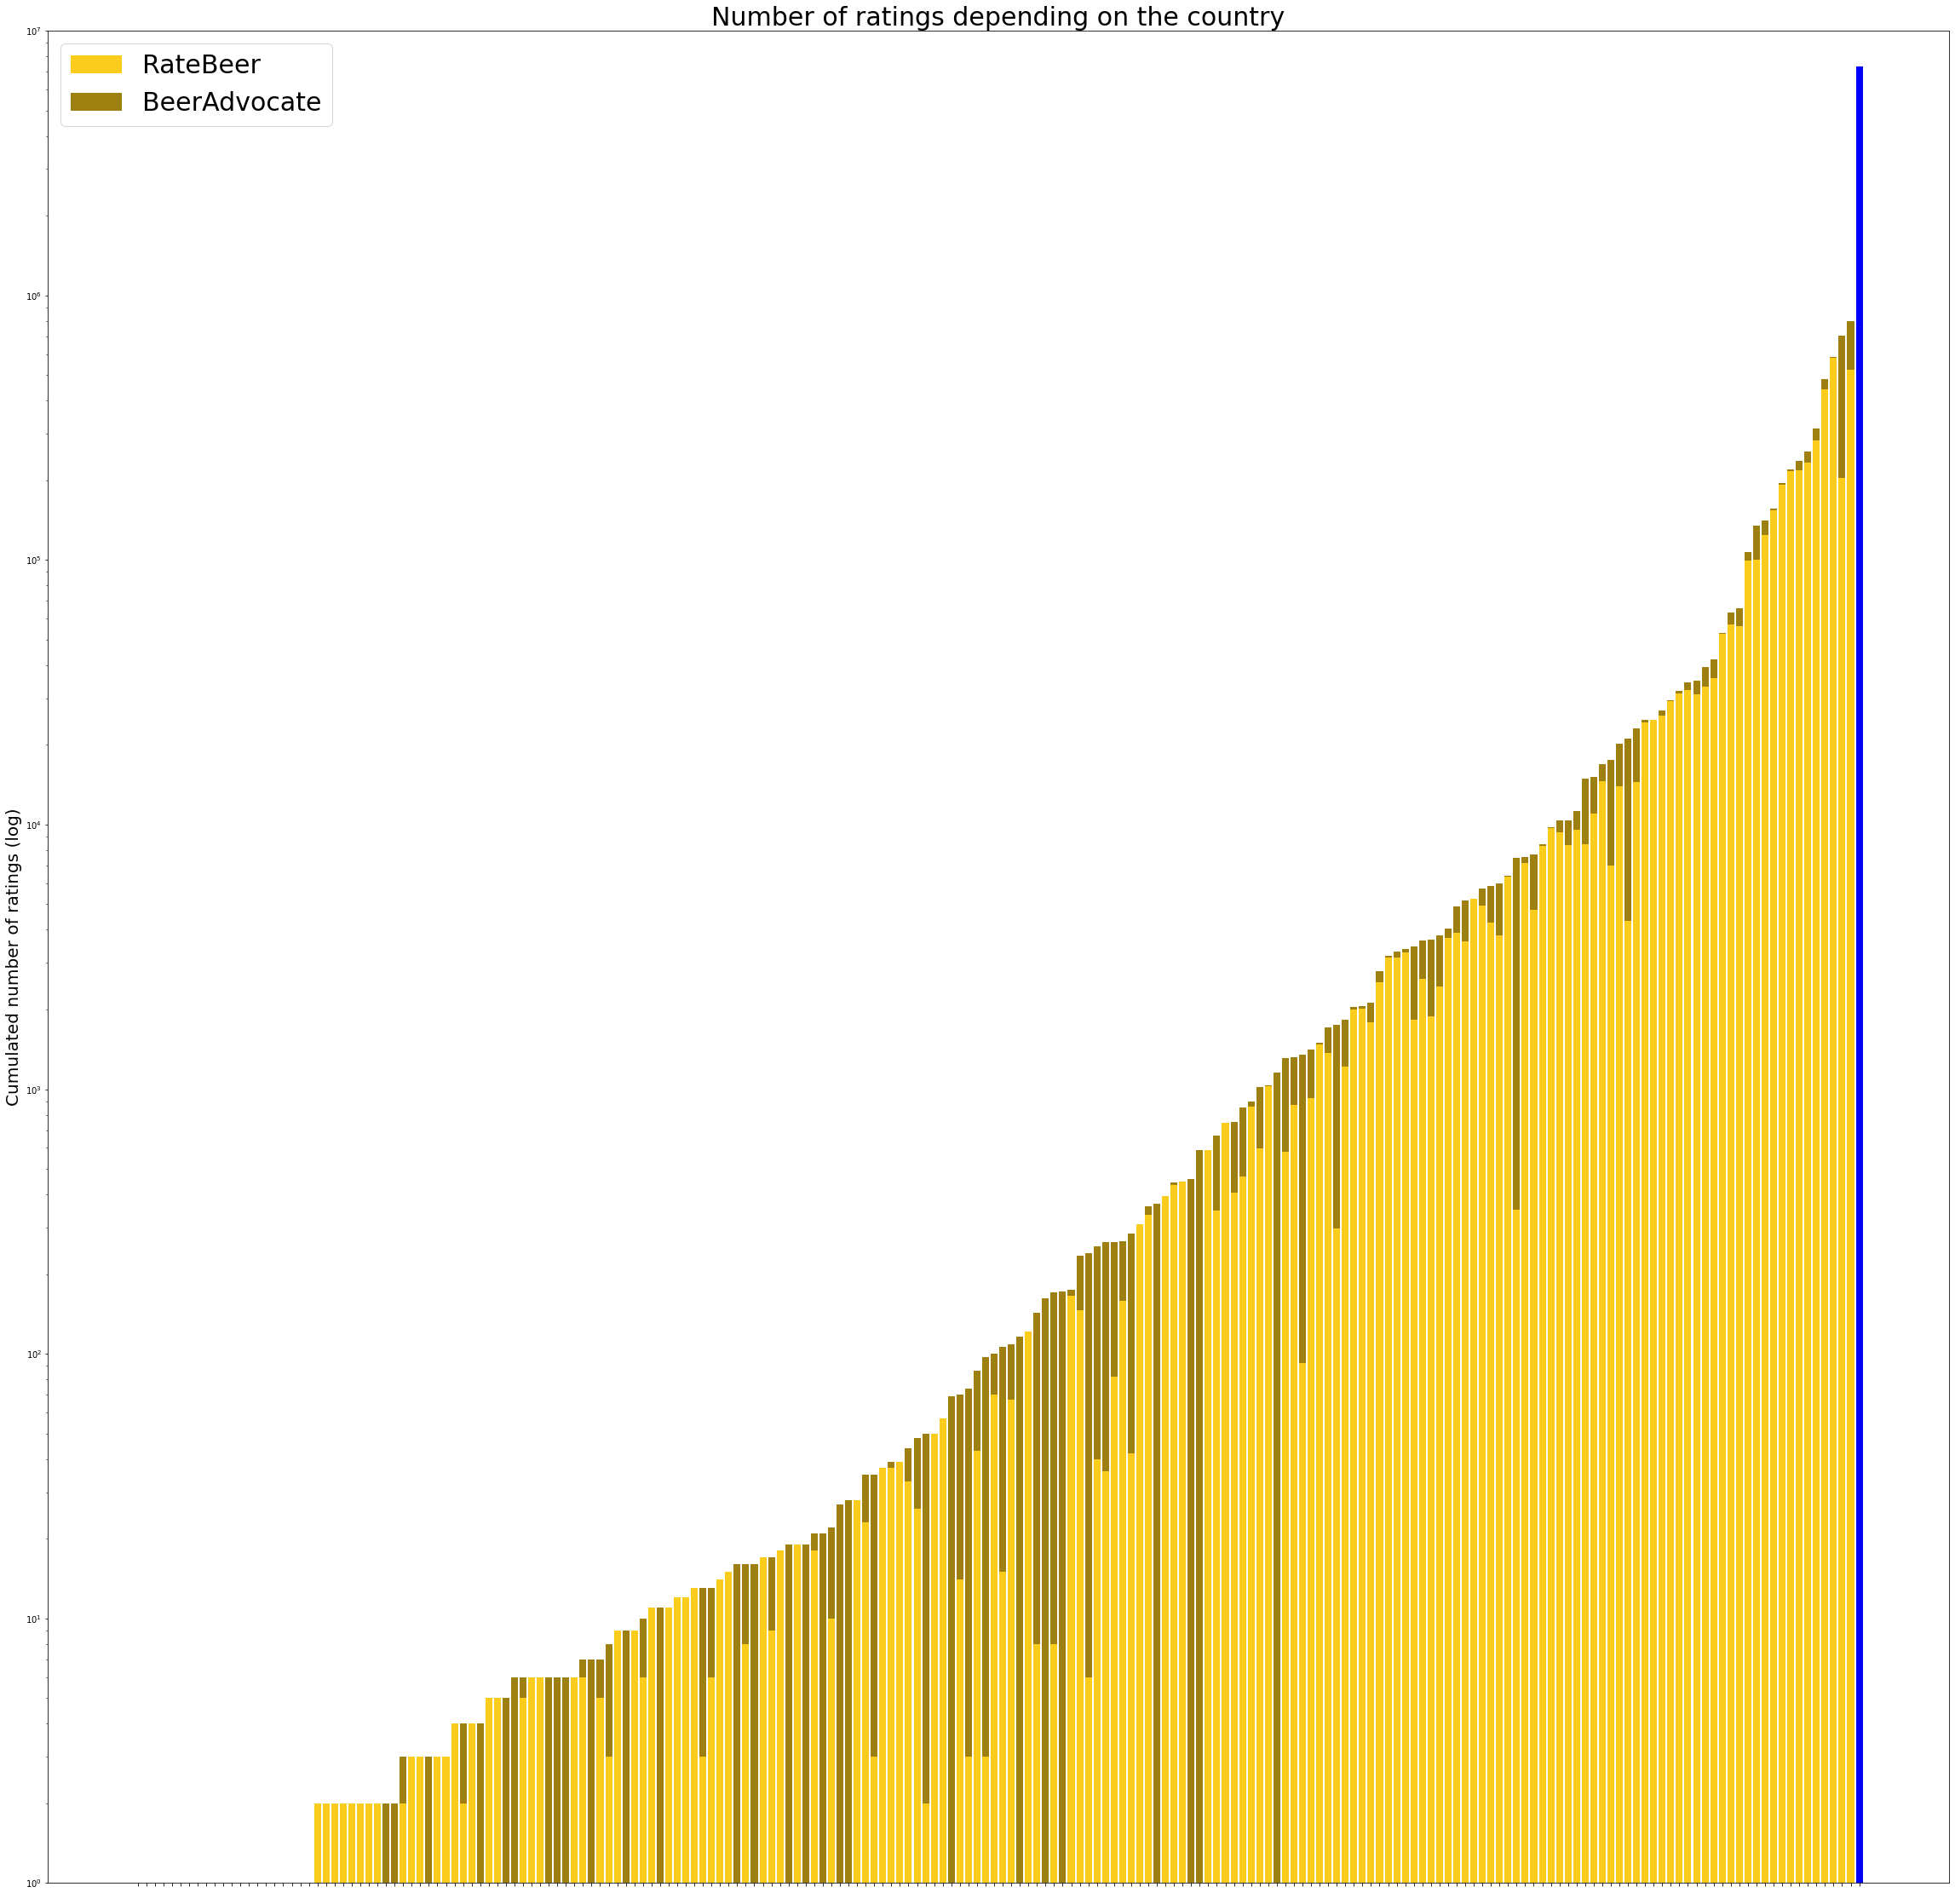

In [28]:
# Plot the distribution
plt.figure(figsize=(40, 40))

# RateBeer
plt.bar(sorted_countries, sorted_nbr_ratings_rb, label='RateBeer', color=rb_color)
plt.bar('United States', nbr_ratings_USagg_rb[-1], color='blue')

# BeerAdvocate
plt.bar(sorted_countries, sorted_nbr_ratings_ba, label='BeerAdvocate', color=ba_color, bottom=sorted_nbr_ratings_rb)
plt.bar('United States', nbr_ratings_USagg_ba[-1], color='blue')

# Legends
plt.yscale('log')
plt.ylim([1,10000000])
plt.legend(prop={'size':30})
plt.xticks(color='w')
plt.ylabel("Cumulated number of ratings (log)", size=20)
plt.title("Number of ratings depending on the country", size=30)
plt.grid(False)
plt.show()

On the above figure we plotted the **number of ratings posted in US in blue** and the number of ratings for all the other countries in yellow. The **y-axis** is in **logarithmic scale**.

We can see that the total number of rating from the US is much higher than in the other countries. There are nearly **10 millions ratings from the US whereas the second country (Canada) only has 1 million**.

💡 **Conclusion** 

Based on the high volume of consumer comments from the United States, it is our recommendation that our client consider opening their brewery in the United States. This decision is further supported by the fact that our client wishes to use consumer comments to inform the development and growth of their business. Conducting this analysis in the United States would provide the most relevant and useful insights.

### **Evolution of the beer industry over the past few years**

In order to assess the feasibility of opening a brewery in the United States for our client, it is necessary to analyze the current state of the beer market in the country. To gather this information, we will research the number and types of breweries that have opened in the United States in recent years. This will provide valuable insight into the market demand and competition for different types of breweries.

#### **Evolution of the number of breweries involved in the ratings per year**

In [29]:
#Retrieve the rows related to United States

#List of states from US
countries_US_ba = [i for i in countries_ba if i.startswith('United States')]
countries_US_rb = [i for i in countries_rb if i.startswith('United States')]

#Filter breweries datasets
breweries_ba = breweries_ba[breweries_ba['location'].isin(countries_US_ba)]
breweries_rb = breweries_rb[breweries_rb['location'].isin(countries_US_rb)]

#Filter beers datasets
beers_ba = beers_ba[beers_ba['location'].isin(countries_US_ba)]
beers_rb = beers_rb[beers_rb['location'].isin(countries_US_rb)]

In [30]:
print(breweries_ba.shape[0], ' american breweries are registred on Beer Advocate')
print(breweries_rb.shape[0], ' american breweries are registred on Rate Beer')

7398  american breweries are registred on Beer Advocate
6907  american breweries are registred on Rate Beer


In [31]:
def evolution_nb_breweries(df) :
  #Create a dict : key = year / value = set of breweries which have at least one rating at this date
  ratings_year = dict()

  for index, row in df.iterrows() :
      brewery_id = row['brewery_id']
      for date in row['dates'] :
        if date.year not in ratings_year :
          ratings_year[date.year] = {brewery_id}
        else : 
          ratings_year[date.year].add(brewery_id)

  #Create a DataFrame which contains the number of breweries involved in the ratings per year
  years = []
  nb_breweries = []
  for key, value in ratings_year.items() :
    years.append(key)
    nb_breweries.append(len(value))

  years_nb_breweries = pd.DataFrame({'year' : years, 'nb_breweries' : nb_breweries})
  years_nb_breweries.sort_values('year', ascending=True, inplace = True)

  return years_nb_breweries


In [32]:
years_nb_breweries_rb = evolution_nb_breweries(beers_rb)
years_nb_breweries_ba = evolution_nb_breweries(beers_ba)

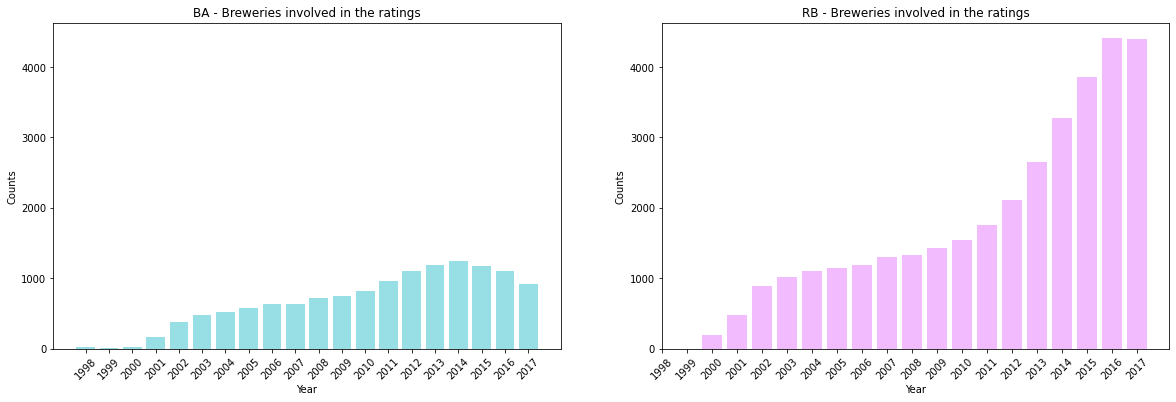

In [33]:
fig = plt.figure(figsize = (20, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

ax1.bar(x=years_nb_breweries_ba.year.values, height = years_nb_breweries_ba.nb_breweries.values, width=0.8, bottom=None, align='center',  color = blue, alpha=0.8)
ax1.set_xlabel('Year')
ax1.set_ylabel('Counts')
ax1.set_title('BA - Breweries involved in the ratings')
ax1.set_xticks(ticks = years_nb_breweries_ba.year.values)
plt.setp(ax1.get_xticklabels(), rotation=45)

ax2.bar(x=years_nb_breweries_rb.year.values, height = years_nb_breweries_rb.nb_breweries.values, width=0.8, bottom=None, align='center',  color = purple, alpha=0.4)
ax2.set_xlabel('Year')
ax2.set_ylabel('Counts')
ax2.set_title('RB - Breweries involved in the ratings')
ax2.set_xticks(ticks = years_nb_breweries_ba.year.values)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.grid(False)
plt.show()

In [34]:
print('BA - Maximum number of breweries (in 2014) : ', years_nb_breweries_ba.nb_breweries.max())
print('RB - Maximum number of breweries (in 2016) : ', years_nb_breweries_rb.nb_breweries.max())

BA - Maximum number of breweries (in 2014) :  1249
RB - Maximum number of breweries (in 2016) :  4410


In [35]:
print('Date of the last rating on Rate Beer :', max(ratings_overview_rb.dates.values))

Date of the last rating on Rate Beer : 2017-07-31T10:00:00.000000000


💡**Conclusion**

There has been significant growth in the number of breweries in the United States in recent years. According to data from Rate Beer, the number of breweries has increased exponentially since 2007, going from 1304 in 2006 to 4410 in 2016, a growth of 238%. On the other hand, data from Beer Advocate shows a different trend, with a peak of around 1200 breweries in 2014, followed by a decrease in the number of breweries since then. Based on these observations, it seems that studying competition in the beer market through the Rate Beer review site would be more relevant in terms of understanding potential competitors for our client.


#### **Evolution of the number of ratings per year**

It is possible that the trend in the number of breweries included in the ratings on different review sites may be influenced by the number of ratings on those sites. This could explain the difference in trends between the data from Rate Beer and Beer Advocate. As such, we will investigate the evolution of the number of ratings for American breweries on both of these websites in order to better understand these trends.

In [36]:
#Get the location of the brewery and add it to the ratings_overview dataset
beers_ba_tmp = beers_ba[['beer_id', 'brewery_id', 'location']]
ratings_overview_ba_tmp = pd.merge(ratings_overview_ba, beers_ba_tmp, how='inner', on='beer_id')

beers_rb_tmp = beers_rb[['beer_id', 'brewery_id', 'location']]
ratings_overview_rb_tmp = pd.merge(ratings_overview_rb, beers_rb_tmp, how='inner', on='beer_id')

#Keep only the ratings produced by american breweries
ratings_overview_ba = ratings_overview_ba_tmp[ratings_overview_ba_tmp['location'].isin(countries_US_ba)]
ratings_overview_rb = ratings_overview_rb_tmp[ratings_overview_rb_tmp['location'].isin(countries_US_rb)]

#Store the year of the rating
ratings_overview_ba['year'] = ratings_overview_ba.dates.apply(lambda x : x.year)
ratings_overview_rb['year'] = ratings_overview_rb.dates.apply(lambda x : x.year)

#Group the ratings by year
ratings_per_year_ba = ratings_overview_ba.groupby('year').beer_id.count()
ratings_per_year_rb = ratings_overview_rb.groupby('year').beer_id.count()


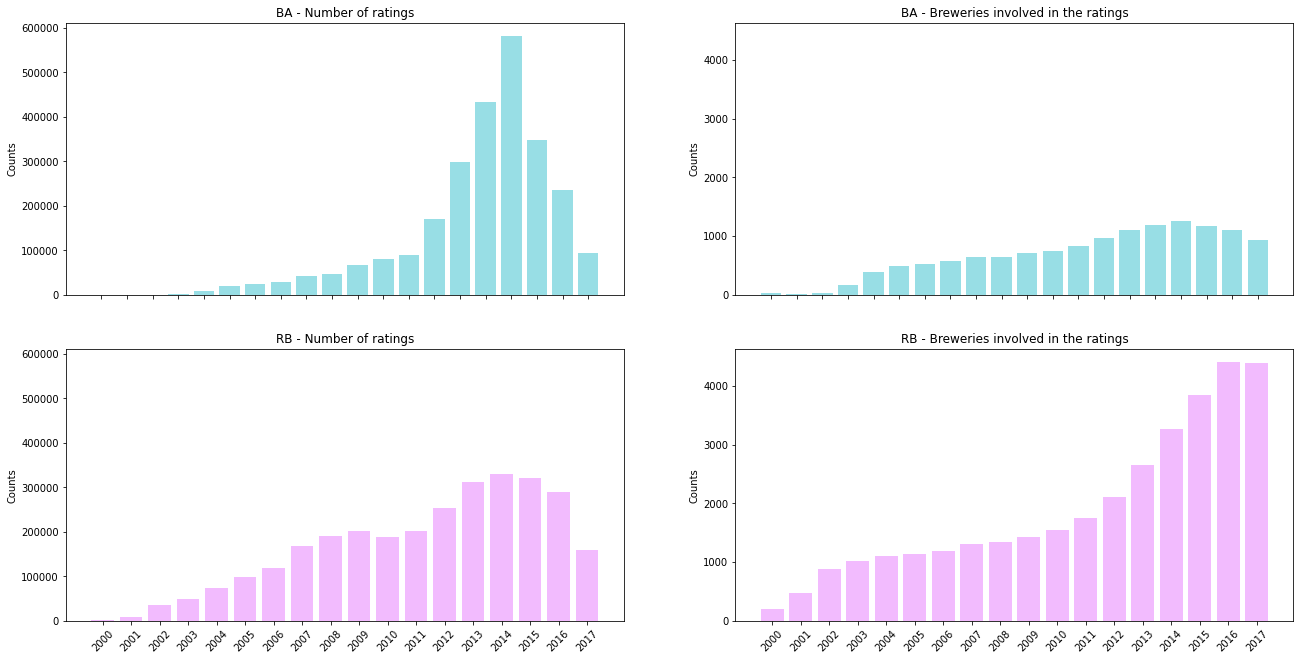

In [37]:
#Plot the evolution of the number of ratings
fig = plt.figure(figsize = (22, 11))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3, sharey=ax1)
ax4 = fig.add_subplot(2, 2, 4, sharey=ax2)

ax1.bar(x=ratings_per_year_ba.index, height = ratings_per_year_ba.values, width=0.8, bottom=None, align='center', color=blue, alpha=0.8)
ax1.set_ylabel('Counts')
ax1.set_title('BA - Number of ratings')
ax1.set_xticks(ticks = years_nb_breweries_ba.year.values)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2.bar(x=years_nb_breweries_ba.year.values, height = years_nb_breweries_ba.nb_breweries.values, width=0.8, bottom=None, align='center',  color = blue, alpha=0.8)
ax2.set_ylabel('Counts')
ax2.set_title('BA - Breweries involved in the ratings')
ax2.set_xticks(ticks = years_nb_breweries_ba.year.values)
plt.setp(ax2.get_xticklabels(), visible=False)

ax3.bar(x=ratings_per_year_rb.index, height = ratings_per_year_rb.values, width=0.8, bottom=None, align='center', color=purple, alpha=0.4)
ax3.set_ylabel('Counts')
ax3.set_title('RB - Number of ratings')
ax3.set_xticks(ticks = years_nb_breweries_rb.year.values)
plt.setp(ax3.get_xticklabels(), rotation=45)

ax4.bar(x=years_nb_breweries_rb.year.values, height = years_nb_breweries_rb.nb_breweries.values, width=0.8, bottom=None, align='center',  color = purple, alpha=0.4)
ax4.set_ylabel('Counts')
ax4.set_title('RB - Breweries involved in the ratings')
ax4.set_xticks(ticks = years_nb_breweries_rb.year.values)
plt.setp(ax4.get_xticklabels(), rotation=45)

plt.show()


In [38]:
print('RB : ', stats.pearsonr(ratings_per_year_rb.values, years_nb_breweries_rb.nb_breweries.values))
print('BA : ', stats.pearsonr(ratings_per_year_ba.values, years_nb_breweries_ba.nb_breweries.values))


RB :  (0.7645778777533397, 0.00021965042116059262)
BA :  (0.8178640658462963, 1.0592513676197868e-05)


We can indeed see that the **number of ratings on Beer Advocate drops drastically from 2015**, while it decreases minimally on Rate Beer (taking into account that ratings stop in July 2017). 

Moreover, the **Pearson coefficients** show actually a **strong linear relationship** (~ $0.76$ for RB and ~ $0.82$ for BA) between the two distributions which is **very significant** (p-value ~ $0.0002$ for RB and ~ $10^{-5}$ for BA).

This **drop** in the **number of comments** on Beer Advocate may explain why the **number of breweries** involved in the ratings **decreases** from 2015. 


Let's now compare the evolution of ratings on the two websites by plotting them on the same plot. 


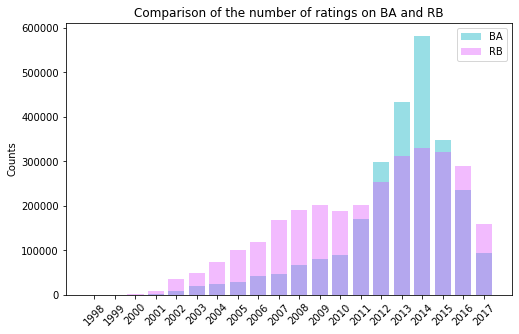

In [39]:
plt.figure(figsize= (8, 5))
plt.bar(x=ratings_per_year_ba.index, height = ratings_per_year_ba.values, width=0.8, bottom=None, align='center', color=blue, alpha=0.8, label = 'BA')
plt.bar(x=ratings_per_year_rb.index, height = ratings_per_year_rb.values, width=0.8, bottom=None, align='center', color=purple, alpha=0.4, label = 'RB')

plt.ylabel('Counts')
plt.title('Comparison of the number of ratings on BA and RB')
plt.xticks(ticks = years_nb_breweries_ba.year.values, rotation=45)
plt.legend()
plt.show()

We can see a **peak** in the number of ratings **between 2010 and 2016** for the two websites, with the **maximum** values reached in **2014**. 

Moreover, **Beer Advocate** gets a **higher** number of ratings **between 2012 and 2015** whereas Rate Beer was always above outside these dates. 

Hence, **Beer Advocate** reached a **high peak in popularity in 2013/2014** with a number of ratings almost equals to **582 242** (so **6 times higher** than in 2014 - 88 398 ratings), but since then, the number of ratings is higher on Rate Beer. 





#### **Evolution of consumers behavior**

To gain insight into the reasons behind the spike in ratings and the shift in popularity between the two websites, we will analyze consumer behavior on both Rate Beer and Beer Advocate. To do this, we will divide the ratings into three periods: 
* The first period between 2007 and 2011, when Rate Beer had the most ratings
* The second period between 2012 and 2015, when Beer Advocate was the most popular
* The third period after 2015, when Rate Beer regained its leading position. 

By examining these periods separately, we can better understand the factors that influenced consumer behavior and the relative popularity of the two websites.

In [40]:
#Extract the year of ratings
ratings_overview_ba['year'] = ratings_overview_ba.dates.apply(lambda x : x.year)
ratings_overview_rb['year'] = ratings_overview_rb.dates.apply(lambda x : x.year)

#----- Keep the ratings from 2007 to 2011 -----
#Count how many different users made at least one rating
ratings_overview_ba_before = ratings_overview_ba[(ratings_overview_ba['dates'] < np.datetime64('2012-01-01')) & (ratings_overview_ba['dates'] >= np.datetime64('2007-01-01'))]
ratings_overview_rb_before = ratings_overview_rb[(ratings_overview_rb['dates'] < np.datetime64('2012-01-01')) & (ratings_overview_rb['dates'] >= np.datetime64('2007-01-01'))]

#----- Keep the ratings from 2012 to 2015 -----
ratings_overview_ba_during = ratings_overview_ba[(ratings_overview_ba['dates'] < np.datetime64('2016-01-01')) & (ratings_overview_ba['dates'] >= np.datetime64('2012-01-01'))]
ratings_overview_rb_during = ratings_overview_rb[(ratings_overview_rb['dates'] < np.datetime64('2016-01-01')) & (ratings_overview_ba['dates'] >= np.datetime64('2012-01-01'))]

# ----- Keep the ratings from 2016 to 2017 ----
ratings_overview_ba_after = ratings_overview_ba[(ratings_overview_ba['dates'] >= np.datetime64('2016-01-01'))]
ratings_overview_rb_after = ratings_overview_rb[(ratings_overview_rb['dates'] >= np.datetime64('2015-01-01'))]


In [41]:
#Basic statistics on the number of ratings made by one user during one year
res_ba = ratings_overview_ba_before.groupby(['user_ids', 'year']).beer_id.count().describe()
res_rb = ratings_overview_rb_before.groupby(['user_ids', 'year']).beer_id.count().describe()

res2_ba = ratings_overview_ba_during.groupby(['user_ids', 'year']).beer_id.count().describe()
res2_rb = ratings_overview_rb_during.groupby(['user_ids', 'year']).beer_id.count().describe()

res3_ba = ratings_overview_ba_after.groupby(['user_ids', 'year']).beer_id.count().describe()
res3_rb = ratings_overview_rb_after.groupby(['user_ids', 'year']).beer_id.count().describe()

res = pd.DataFrame({'BA - before' : res_ba.values, 'BA - during' : res2_ba.values, 'BA - after' : res3_ba.values,
                    'RB - before' : res_rb.values, 'RB - during' : res2_rb.values, 'RB - after' : res3_rb.values})
res.set_index(res_ba.index, inplace = True)
res

,BA - before,BA - during,BA - after,RB - before,RB - during,RB - after
count,32003.000000,107713.000000,25040.000000,24209.000000,61629.000000,17862.000000
mean,14.113739,15.443688,13.073403,39.183857,27.453098,43.168346
std,30.008880,36.165345,28.795036,97.489078,74.307714,143.653559
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,5.000000,4.000000,3.000000
75%,13.000000,13.000000,12.000000,28.000000,18.000000,20.000000
max,853.000000,1463.000000,824.000000,2974.000000,2324.000000,4527.000000


We have compiled descriptive statistics of the **number of comments made by each user over a year** during the three periods in the DataFrame above.
<br> First, it is clear that there were significantly more consumers on both sites between 2012 and 2015: 
* $107 713$ users vs $32 003$ before and $25 040$ after for BA 
* $43 798$ users vs $24 209$ before and $17 862$ after for RB

This suggests that there may have been a surge of interest in trying new beers and giving opinions on review sites like Beer Advocate and Rate Beer during this period.
<br> Additionally, we see that outside of the 2012 to 2015 period, Rate Beer users tend to rate more beers on average per year than Beer Advocate users: 
* On average 14 beers per user per year before and 13 after for BA
* On average 39 beers per user per year before and 43 after for RB

It is interesting to note that the average number of beers rated remains relatively constant (around 15) on Beer Advocate between 2012 and 2015, while it has decreased significantly for Rate Beer (around 16) during this period. This could be explained by the fact that many amateurs rated beers on Rate Beer during this time.

<br> In conclusion, we can interpret these findings as follows: Rate Beer users are more experienced and consistent in their rating activity, likely being true beer enthusiasts who are willing to try and review new beers. On the other hand, Beer Advocate consumers seem to be more amateur in their approach, with a surge in activity between 2012 and 2015 when the number of ratings on Beer Advocate surpassed those on Rate Beer. These consumers may have been caught up in the hype of discovering new beers during this time, but as the hype died down, their rating activity decreased. It appears that these amateur consumers turned more to Beer Advocate, while those with more experience favored Rate Beer for their ratings.

#### **Did this hype around beers have an impact on breweries ?** 

We want to determine whether the recent growth in the number of beer ratings on review websites has had a positive impact on the brewery business in the United States. To do this, we will focus on the breweries listed on Rate Beer, as there are more of them listed on this site than on Beer Advocate.

To answer the following questions, we will compare the evolution over the years of the number of **"in" breweries** (those that appear for the first time in the ratings) and **"out" breweries** (those that no longer appear in the ratings):

> Were the breweries already known to users on the beer review sites or did new breweries appear in the ratings?

> Do users easily adopt a new brewery and continue rating it over time after their first rating?

By examining these trends, we can better understand the success and sustainability of new breweries in the market.

In [42]:
#For each brewery, we keep the first and last years where they appear in the ratings. 
def first_year_review(x) :
  return min(x).year

def last_year_review(x) :
  return max(x).year

def first_last_years_ratings(beers_US_rb) :
    #Retrieve first and last years of the ratings for each beer
    beers_US_rb['first_year_review'] = beers_US_rb.dates.apply(lambda x : first_year_review(x))
    beers_US_rb['last_year_review'] = beers_US_rb.dates.apply(lambda x : last_year_review(x))

    #Retrieve first and last years of the ratings for each brewery
    first_years = dict()
    last_years = dict()

    for index, row in beers_US_rb.iterrows() : 
      if row['brewery_id'] not in first_years : 
        first_years[row['brewery_id']] = row['first_year_review']

      if row['brewery_id'] in first_years :
        first_years[row['brewery_id']] = min(row['first_year_review'], first_years[row['brewery_id']])
      
      if row['brewery_id'] not in last_years : 
        last_years[row['brewery_id']] = row['last_year_review']
      
      if row['brewery_id'] in last_years :
        last_years[row['brewery_id']] = max(row['last_year_review'], last_years[row['brewery_id']])
    
    #Create a DataFrame with the brewery_id, first and last years of ratings
    first_last_years_df = pd.DataFrame({'brewery_id' : first_years.keys(), 'first_year' : first_years.values(), 'last_year' : last_years.values()})
    first_years_serie = first_last_years_df.groupby('first_year').brewery_id.count()
    last_years_serie = first_last_years_df.groupby('last_year').brewery_id.count()
    first_last_years_count = pd.DataFrame({'year' : first_years_serie.index, 'first_year' : first_years_serie.values, 'last_year' : last_years_serie.values})

    return first_last_years_count, first_last_years_df

In [43]:
first_last_years_count, first_last_years_df = first_last_years_ratings(beers_rb)

In [44]:
#We remove the last year because we don't have all the ratings from 2017
first_last_years_count_to_plot = first_last_years_count.loc[first_last_years_count['year'] < 2017]
years_nb_breweries_rb_to_plot = years_nb_breweries_rb.loc[years_nb_breweries_rb['year'] < 2017]

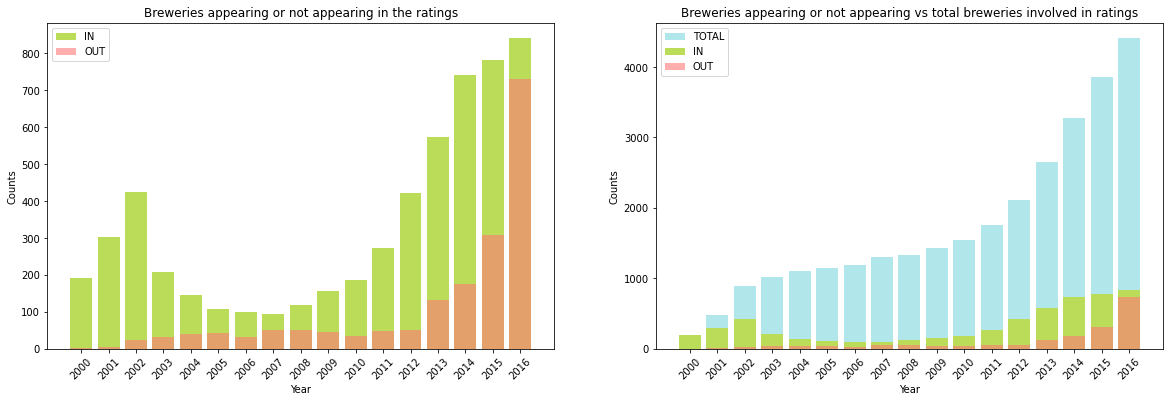

In [45]:
fig = plt.figure(figsize = (20, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.bar(x=first_last_years_count_to_plot.year, height = first_last_years_count_to_plot.first_year, 
        width=0.8, bottom=None, align='center', color=green, alpha=1, label = "IN")
ax1.bar(x=first_last_years_count_to_plot.year, height = first_last_years_count_to_plot.last_year, 
        width=0.8, bottom=None, align='center', color=red, alpha=0.6, label = "OUT")
ax1.set_xlabel('Year')
ax1.set_ylabel('Counts')
ax1.set_title('Breweries appearing or not appearing in the ratings')
ax1.set_xticks(ticks = first_last_years_count_to_plot.year)
ax1.legend()
plt.setp(ax1.get_xticklabels(), rotation=45)

ax2.bar(x=years_nb_breweries_rb_to_plot.year.values, height = years_nb_breweries_rb_to_plot.nb_breweries.values, 
        width=0.8, bottom=None, align='center',  color = blue, alpha=0.6, label = 'TOTAL')
ax2.bar(x=first_last_years_count_to_plot.year, height = first_last_years_count_to_plot.first_year, 
        width=0.8, bottom=None, align='center', color=green, alpha=1, label = "IN")
ax2.bar(x=first_last_years_count_to_plot.year, height = first_last_years_count_to_plot.last_year, 
        width=0.8, bottom=None, align='center', color=red, alpha=0.6, label = "OUT")
ax2.set_xlabel('Year')
ax2.set_ylabel('Counts')
ax2.set_title('Breweries appearing or not appearing vs total breweries involved in ratings')
ax2.set_xticks(ticks = first_last_years_count_to_plot.year)
ax2.legend()
plt.setp(ax2.get_xticklabels(), rotation=45)

plt.show()

In [46]:
print('First year/Last year : ', stats.pearsonr(first_last_years_count.first_year, first_last_years_count.last_year))
print('First year/Total : ', stats.pearsonr(years_nb_breweries_rb.nb_breweries.values, first_last_years_count.first_year))

First year/Last year :  (0.3083572992054753, 0.2131536495653254)
First year/Total :  (0.8342528446747818, 1.6788754595843743e-05)


The number of 'in' breweries and the overall number of breweries included in the ratings show a strong correlation over the years, with a Pearson coefficient of approximately 0.83 and a significant p-value of around 10^-5.

While the number of 'in' breweries remained relatively low between 2004 and 2008, it then saw a rapid increase until reaching 841 new breweries in the ratings in 2016. This growth appears to be closely connected to the increase in interest and activity in the beer market in the United States starting in 2012, as there were approximately 150 new 'in' breweries added each year between 2011 and 2014, corresponding to the spike in ratings we observed earlier. However, further analysis would be needed to determine the direction of causality between the two trends: whether the influx of new breweries drove the desire among Americans to discover new beers, or if the trend of discovering new beers prompted an increase in the number of new breweries.

The number of 'out' breweries, or those that are no longer included in the ratings, remained relatively stable until 2012 and then saw a sharp increase to 730 'out' breweries in 2016, almost the same number as the 'in' breweries that year. This could potentially be linked to the increased competition in the market and the presence of hundreds of new breweries each year. To better understand the nature of these 'out' breweries, we will separate them based on the number of years between their first and last rating.

In [47]:
#Retrieve breweries with first rating after 2007 (before the peak in the ratings)
first_last_years_df_after = first_last_years_df[(first_last_years_df['first_year'] >= 2007) & (first_last_years_df['first_year'] < 2017)]

In [48]:
def in_out_diff_years(first_last_years_df_after) : 
  #List with the percentage of breweries, s.t. nb_breweries_in_out[i] contains the percentage of breweries having i years 
  #of difference between 1st and last review
  nb_breweries_in_out = []

  #Dict which stores these values
  breweries_in_out = dict()

  #Check for diff in years between 0 and 10 
  for i in range(11) : 
    #Keep rows where last_year - first_year = i 
    first_last_years1 = first_last_years_df_after.loc[first_last_years_df_after['last_year'] - first_last_years_df_after['first_year'] == i]
    #Retrieve total number of breweries
    nb = first_last_years1.shape[0]
    #Compute percentage
    nb_breweries_in_out.append(100*nb/first_last_years_df.shape[0])
    #Add valeus to list and dict
    breweries_id = first_last_years1.brewery_id.values
    breweries_in_out[str(i)] = breweries_id

  in_out_per_df = pd.DataFrame({'Diff.between first and last review (years)' : [i for i in range(11)], 
                                  'Percentage of breweries' : nb_breweries_in_out})
  in_out_per_df.set_index('Diff.between first and last review (years)')

  return in_out_per_df
  

def avg_nb_rating_per_beers_diff(first_last_years_df_after, ratings_overview_rb) : 
  avg_nb_rating_per_beers = []
  avg_rating_per_beers = []
  for i in range(11) :
    first_last_years1 = first_last_years_df_after.loc[first_last_years_df_after['last_year'] - first_last_years_df_after['first_year'] == i ]
    ratings_diff = ratings_overview_rb.loc[ratings_overview_rb['brewery_id'].isin(first_last_years1.brewery_id.values)]
    avg_nb_ratings_per_beer = ratings_diff.groupby('beer_id').user_ids.count().values
    avg_rating = ratings_diff.rating.mean()
    avg = np.mean(avg_nb_ratings_per_beer)
    avg_nb_rating_per_beers.append(avg)
    avg_rating_per_beers.append(avg_rating)
  return avg_nb_rating_per_beers, avg_rating_per_beers

In [49]:
in_out_per_df = in_out_diff_years(first_last_years_df_after)
avg_nb_rating_per_beers, avg_rating_per_beers = avg_nb_rating_per_beers_diff(first_last_years_df_after, ratings_overview_rb)
in_out_per_df['avg_nb_ratings_per_beer'] = avg_nb_rating_per_beers
in_out_per_df['avg_rating'] = avg_rating_per_beers

print('Percentage of breweries with at least 5 years between first and last ratings : ',
      in_out_per_df.loc[in_out_per_df['Diff.between first and last review (years)'] >= 5]['Percentage of breweries'].sum(), '%\n')
in_out_per_df

Percentage of breweries with at least 5 years between first and last ratings :  16.212292305210518 %



,Diff.between first and last review (years),Percentage of breweries,avg_nb_ratings_per_beer,avg_rating
0,0,6.000968,1.331045,3.222292
1,1,13.969995,2.437302,3.493589
2,2,12.308437,3.127507,3.489144
3,3,10.872721,4.154075,3.506940
4,4,8.162607,6.233131,3.558710
5,5,6.065494,6.911516,3.497691
6,6,3.710276,11.253154,3.560884
7,7,2.387482,20.334900,3.624222
8,8,1.790611,11.686741,3.491978
9,9,1.467979,11.840483,3.473752


In the table above, we have grouped the breweries according to the **difference between the year of the first and last rating**. We also calculated the **average number of comments per beer for each category**, and the **average rate**.

We can see here that **$6$ %** of the breweries **disappear** in the ratings the **same year as the first rating**. Moreover, the **average number of ratings** per beer is almost equal to **$1$**. These breweries have not been able to break through the competition. 

>It could be interesting to study the comments on these beers to determine the reason for their failure with consumers. 


We have observed that the percentage of breweries decreases as the number of years between their first and last rating increases, while the average number of ratings per beer increases. This suggests that new breweries that appear in the ratings tend to not last over time and may struggle to maintain consumer interest.
However, those breweries that have been successful in establishing themselves in the industry tend to see an increase in the average number of comments over time. It is worth noting that the percentage of breweries with more than 5 years between their first and last comment is relatively small, around 16.5%.

#### ✅ **Conclusion of Part I**



States, as evidenced by the rapid growth in the number of breweries included in the ratings, which rose from 1,304 in 2006 to 4,410 in 2016, representing a 238% increase. This growth was accompanied by a surge in the number of ratings on Rate Beer and Beer Advocate, likely due to an influx of amateur beer enthusiasts.

The highly competitive nature of the industry is reflected in the fact that many new breweries struggle to maintain consumer interest over time, with more than half of the new breweries on the market receiving comments on their beers for only one year. Our client will need to be particularly mindful of this challenge and focus on ways to differentiate their brewery and retain customers.

To help our client maximize their chances of success, we will conduct a competitive analysis to determine the most strategic location for their brewery and identify opportunities to outperform the competition. We will focus on Rate Beer for this analysis, as it has a larger number of breweries included in the ratings.

Additionally, we will use Rate Beer to analyze the characteristics of a beer that appeal to a more experienced and discerning audience, such as the associations of flavors, aromas, and palates, in order to provide the most informed advice on recipe selection. Meanwhile, we will use Beer Advocate to understand what aspects of a beer create a buzz and generate hype, such as packaging, style, and certain flavors, in order to appeal to the amateur market, which we have seen is a significant portion of the market.

## **Part 2 - Competitive analysis**

In this second part, we will determine *who are the potential competitors of our client*. Let's note that our client has given us the following specifications: 
- Passionate about beer, he wants to be as close as possible to his customers and therefore wants to **reach a local clientele** in the state where he will set up his brewery. 
- He is **not able to produce more than 30 beers**. 
- He is **open to all states to set up his brewery**. 

To assist our client in selecting the location for their brewery, we will first examine consumer behavior in each state. Then, we will identify competitors with a similar production capacity, meaning local breweries that produce no more than 30 beers.

### **Where should you open your brewery?**

In order to determine ***which states our client should open its brewery in***, we will identify the states where :    

- There is a **large market share to be reached** and a **large number of users** on the review sites. We will asses these properties by looking at the following indicators:
> - Number of *users per state*
> - Number of *breweries per state*
> - *Number of users / Number of breweries*
> - *Evolution* of the *number of users* on the BA and RB sites 

- There are **consumers who like local beers**, identified through these indicators:
> - *Percentage of ratings* of consumers coming from the same state as the brewery
> - *Evolution of the percentage* of ratings for beers produced within the state compared to the total number of ratings in the state 

- There are **beer enthusiasts** who make a large number of ratings on the review sites and who can be reached by our client's products, which we will evaluate by examining:
> - *Number of ratings / Number of users*
> - *Average of the number of ratings per user*







#### **States with a large market share to reach**


The beer market in the United States has experienced significant growth in recent years, with an increasing number of breweries opening and more Americans becoming interested in beer. However, the industry has become highly competitive, and it is crucial for our client to carefully select the location for their brewery in a state where there is a market for beer and relatively little competition.

To begin, we will determine the locations of the users of Rate Beer and Beer Advocate.

##### **Repartition of users and breweries across the states**

In [50]:
#We define some functions we will use for this part
def retrieve_us(df) :
  """Keep only the rows with a location in US""" 
  if 'location' in df.columns : 
    df = df.loc[df['location'].isin(countries_US_rb)]
  elif 'loc_brewery' in df.columns : 
    df = df.loc[df['loc_brewery'].isin(countries_US_rb)]
  elif 'loc_user' in df.columns : 
    df = df.loc[df['loc_user'].isin(countries_US_rb)]

  return df

def state_code(x) :
  """Returns the state code"""
  return us_state_to_abbrev[' '.join(x.split()[2:])]

def add_state_code(df) :
  """Add a column with the state code in a DataFrame"""
  df['state_code'] = df.state.apply(lambda x : state_code(x))
  return df

def plot_map(df, column_to_plot) : 
  """Plot column_to_plot' in a map, df should have a column 'state_code"""
  fig = px.choropleth(df,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color=column_to_plot,
                    color_continuous_scale="Reds", 
                    )
  fig.show()

def top_10(df, column) : 
  return df.sort_values(column, ascending=False).head(10)

def mapping_name_to_index(countries_US_rb) : 
  name_to_index = dict()
  for index, name in enumerate(countries_US_rb) : 
    name_to_index[name] = index
  return name_to_index

In [51]:
#DataFrame which stores the results of our analysis 
#1 for interesting / 2 for very interesting / 0 for neutral / -1 for not interesting 
res_df = pd.DataFrame({'state' : countries_US_rb})
res_df.sort_values('state', inplace=True)
res_df.index = [i for i in range(50)]

#Initialize mapping from name to index row 
countries_US = sorted(countries_US_rb)
name_to_index = mapping_name_to_index(countries_US)

In [52]:
#Retrieve only users from US
users_rb_us = retrieve_us(users_rb)
users_ba_us = retrieve_us(users_ba)
users = pd.concat([users_rb_us, users_ba_us])

#Count the number of users per state
users_by_state = users.groupby('location').user_id.count()
users_by_state_df = pd.DataFrame({'state' : users_by_state.index, 'nb_users' : users_by_state.values})
users_by_state_df = add_state_code(users_by_state_df)

#Plot the number of users per state
plot_map(users_by_state_df, 'nb_users')

In [53]:
import plotly.express as px 
fig = px.choropleth(users_by_state_df,  # Input Pandas DataFrame
                    locations="state_code",  # DataFrame column with locations
                    color="nb_users",  # DataFrame column with color values
                    hover_name="state_code", # DataFrame column hover info
                    locationmode = 'USA-states')

fig.update_layout(
    title_text = 'State Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig.write_html("usa_map.html")

fig.show() 

We see that the **number of consumers** is highest in California, Pennsylvania and New York. The abundance of consumers is usually good news because it indicates a large market for our product.However, the number of breweries in these areas may also be very high, making the market saturated and the industry very competitive. 

So we need to *compare these results to the number of breweries installed in each state*. 

In [54]:
#Retrieve only breweries from US
breweries_rb_us = retrieve_us(breweries_rb)
breweries_ba_us = retrieve_us(breweries_ba)
breweries = pd.concat([breweries_rb_us, breweries_ba_us])

#Count the number of breweries per state
breweries_by_state = breweries.groupby('location').id.count()
breweries_by_state_df = pd.DataFrame({'state' : breweries_by_state.index, 'nb_breweries' : breweries_by_state.values})
breweries_by_state_df = add_state_code(breweries_by_state_df)

#Plot the number of users per state
plot_map(breweries_by_state_df, 'nb_breweries')

In [55]:
top_10_users = top_10(users_by_state_df, 'nb_users')
top_10_breweries = top_10(breweries_by_state_df, 'nb_breweries')
common_users_breweries = top_10_users.merge(top_10_breweries, how='inner', on = 'state' )
common_users_breweries['ratio'] = common_users_breweries['nb_users'] / common_users_breweries['nb_breweries']
common_users_breweries

,state,nb_users,state_code_x,nb_breweries,state_code_y,ratio
0,"United States, California",14442,CA,1796,CA,8.041203
1,"United States, Pennsylvania",10321,PA,626,PA,16.487220
2,"United States, New York",8784,NY,790,NY,11.118987
3,"United States, Illinois",8272,IL,504,IL,16.412698
4,"United States, Texas",7316,TX,518,TX,14.123552
5,"United States, Florida",5873,FL,532,FL,11.039474
6,"United States, Michigan",5354,MI,637,MI,8.405024


As we assumed earlier, the **map** representing the **number of breweries per state** is **similar** to that of the **number of users per state**. 

Of the 10 states with the most users, 7 also have the most breweries. So there could be a **lot of competition** in these states. Indeed, in California and Michigan, there are only 8 customers per brewery, which does not leave much room for newcomers. 

At this stage of the analysis, we do not recommend these states to our client. 


In [56]:
states = top_10_users.loc[~(top_10_users['state'].isin(common_users_breweries.state.values))]
states = states.merge(breweries_by_state_df, how='inner', on='state')
states['ratio'] = states['nb_users'] / states['nb_breweries']
states

,state,nb_users,state_code_x,nb_breweries,state_code_y,ratio
0,"United States, Massachusetts",7332,MA,333,MA,22.018018
1,"United States, Ohio",5934,OH,456,OH,13.013158
2,"United States, New Jersey",4551,NJ,209,NJ,21.775120


The states of **Massachusetts and New Jersey** are more interesting, since the **ratio nb_users/nb_breweries is higher** than in the states of the previous table.

However, for **Ohio**, the **number of breweries is very high** while the **number of users is not in the top 10**. We therefore do not recommend this state. 


In [57]:
#Store the results
res_df['Users & Breweries'] = [0 for i in range(res_df.shape[0])]
res_df.at[name_to_index['United States, Massachusetts'], 'Users & Breweries'] = 1
res_df.at[name_to_index['United States, New Jersey'], 'Users & Breweries'] = 1
res_df.at[name_to_index['United States, Ohio'], 'Users & Breweries'] = -1

for index, row in common_users_breweries.iterrows() : 
  res_df.at[name_to_index[row['state']], 'Users & Breweries'] = -1

From what we have just seen, it may be interesting to *study the ratio nb_users/nb_breweries*.

In [58]:
breweries_users = users_by_state_df.merge(breweries_by_state_df, how='inner', on='state')
breweries_users['ratio'] = breweries_users['nb_users'] / breweries_users['nb_breweries']
breweries_users.sort_values('ratio', ascending=False).head(10)

,state,nb_users,state_code_x,nb_breweries,state_code_y,ratio
38,"United States, Rhode Island",881,RI,40,RI,22.025000
20,"United States, Massachusetts",7332,MA,333,MA,22.018018
29,"United States, New Jersey",4551,NJ,209,NJ,21.775120
0,"United States, Alabama",1847,AL,87,AL,21.229885
9,"United States, Georgia",3358,GA,176,GA,19.079545
6,"United States, Connecticut",3078,CT,177,CT,17.389831
37,"United States, Pennsylvania",10321,PA,626,PA,16.487220
12,"United States, Illinois",8272,IL,504,IL,16.412698
19,"United States, Maryland",2867,MD,202,MD,14.193069
35,"United States, Oklahoma",949,OK,67,OK,14.164179


While the ratio of breweries to users is high in certain states, some of these states have a relatively small number of users (such as Rhode Island and Alabama), which may not provide a suitable customer base for our client's products. However, examining the trend in the number of users over the past few years may help us determine if demand is likely to increase in the future. This could present an opportunity for our client to establish a strong market share and become a leader in states where there are currently few established breweries.

##### **Evolution of the number of users over the years**

In [59]:
#Merge the location of users to the ratings 

#Only keep the users from USA and the columns user_id/location from this dataframe
users_rb_US = retrieve_us(users_rb)[['user_id', 'location']]
users_ba_US = retrieve_us(users_ba)[['user_id', 'location']]
users_from_US = pd.concat([users_rb_US, users_ba_US])

#Rename the column user_ids and location from ratings 
ratings_overview_rb.rename(columns = {'user_ids' : 'user_id', 'location' : 'loc_brewery'}, inplace=True)
ratings_overview_ba.rename(columns = {'user_ids' : 'user_id', 'location' : 'loc_brewery'}, inplace=True)

#Rename the column location from ratings 
users_rb_US.rename(columns = {'location' : 'loc_user'}, inplace=True)
users_ba_US.rename(columns = {'location' : 'loc_user'}, inplace=True)

#Merge ratings and users to get the location of the user
ratings_rb_from_US = ratings_overview_rb.merge(users_rb_US, how='inner', on='user_id')
ratings_ba_from_US = ratings_overview_ba.merge(users_rb_US, how='inner', on='user_id')
ratings_from_US = pd.concat([ratings_rb_from_US, ratings_ba_from_US])

In [60]:
#For each year, we count the number of ratings per state
count_users_list = []

#For each year
for year in range(2007, 2017) :
  #Keep only the local ratings for that year 
  df_tmp = ratings_from_US.loc[ratings_from_US['year']==year]
    
  #Group by the state and retrieve the number of local ratings for this year
  count_user_year = df_tmp.groupby('loc_user').beer_id.count()
  count_user_year = count_user_year.to_dict()

  #Make all the dictionaries of the same length
  for state in countries_US : 
    if state not in count_user_year.keys() : 
      count_user_year[state] = 0 
    if state not in count_user_year.keys() : 
      count_user_year[state] = 0 

  count_users_list.append(count_user_year)

def create_df_counts_per_state(df) : 
  """Create a DataFrame from a list of dict"""
  df = pd.DataFrame.from_dict(df)
  df['year'] = [i for i in range(2007, 2017)]
  df.set_index('year', inplace=True)
  df = df.T
  df = df.fillna(0)
  return df

In [61]:
#Create the dataframes
counts_users_df = create_df_counts_per_state(count_users_list).sort_index()
#Statistics of the last year with full ratings
print(counts_users_df[2016].describe())

count       50.000000
mean      4125.040000
std       4398.616317
min         22.000000
25%        772.250000
50%       3047.000000
75%       6058.750000
max      18996.000000
Name: 2016, dtype: float64


In [62]:
counts_users_df2 = counts_users_df.loc[counts_users_df[2016] >= counts_users_df[2016].quantile(0.5)].sort_values(2016, ascending = False)

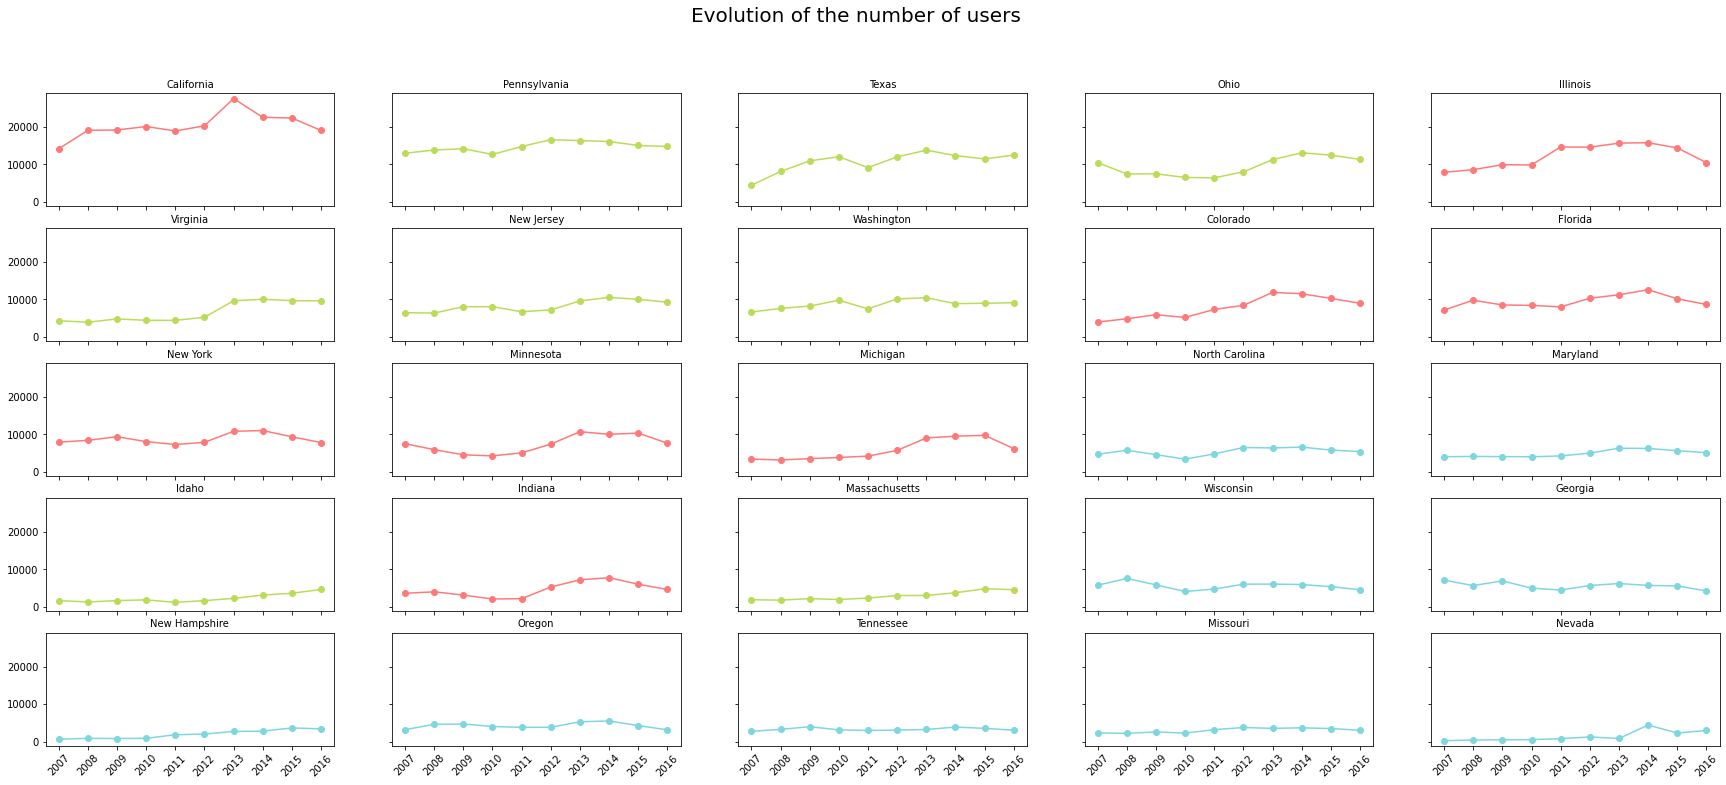

In [63]:
fig, axs = plt.subplots(5, 5, figsize=(30,12), sharex=True, sharey=True)
fig.suptitle('Evolution of the number of users', fontsize=20)

for i, state in enumerate(counts_users_df2.index):
    # Get the info on the plot
    row = i // 5
    col = i % 5
    subplot = axs[row, col]
    
    # Get the list of points
    state_info = counts_users_df2.iloc[i].values

    #Set the label 
    label = ' '.join(state.split()[2:])

    # Plot the percentage of breweries rated 
    if label in ['California', 'Illinois', 'New York', 'Colorado', 'Florida', 'New York', 'Minnesota', 'Michigan', 'Indiana'] : 
      subplot.plot(counts_users_df2.columns, state_info, color=red, marker = 'o')
    elif label in ['Pennsylvania', 'Texas', 'Virginia', 'New Jersey', 'Washington', 'Idaho', 'Massachusetts', 'Ohio'] : 
      subplot.plot(counts_users_df2.columns, state_info, color=green, marker = 'o')
    else : 
      subplot.plot(counts_users_df2.columns, state_info, color=blue, marker = 'o')

    subplot.set_xticks([i for i in range(2007, 2017)])
    plt.setp(subplot.get_xticklabels(), rotation=45)
    subplot.set_title(label, fontsize=10)


plt.show()

We can observe that some states have seen an increase or stabilization in the number of users over the past few years, indicating a growing interest in beer in these states. Texas, Ohio, Virginia, and Idaho have particularly strong trends in recent years and may represent potential target states for our client.

On the other hand, other states have seen a decline in the number of users in recent years. California and Illinois are among the states with the highest number of consumers and breweries. We advise against these states as it appears that there was a significant interest in beer in these states in the past few years, but this enthusiasm may be diminishing.

In [64]:
res_df['Evolution users'] = [0 for i in range(res_df.shape[0])]
for name in ['Texas', 'Ohio', 'Virginia', 'Idaho'] :
  res_df.at[name_to_index['United States, ' + name], 'Evolution users'] = 2

for name in ['Pennsylvania', 'New Jersey', 'Washington', 'Massachusetts'] : 
  res_df.at[name_to_index['United States, ' + name], 'Evolution users'] = 1

for name in ['New York', 'Colorado', 'Florida', 'New York', 'Minnesota', 'Michigan', 'Indiana'] :
  res_df.at[name_to_index['United States, ' + name], 'Evolution users'] = -1

for name in ['California', 'Illinois'] :
  res_df.at[name_to_index['United States, ' + name], 'Evolution users'] = -2

#### **Where are the local beer lovers?**



Our client wants to **reach a local clientele** in the state where he will set up his brewery, so we are going to determine *which states have a preference for local products*. 

To do this, we will measure for each state the **percentage of ratings related to beers produced in the user's state compared to the total number of ratings in the state**. 

Next, we will determine *which states could potentially contain local beer lovers* by **studying the change in the percentage of local ratings over time.** 

In [65]:
#Merge the location of users to the ratings 

#Only keep the users from USA and the columns user_id/location from this dataframe
users_rb_US = retrieve_us(users_rb)[['user_id', 'location']]
users_ba_US = retrieve_us(users_ba)[['user_id', 'location']]
users_from_US = pd.concat([users_rb_US, users_ba_US])

#Rename the column user_ids and location from ratings 
ratings_overview_rb.rename(columns = {'user_ids' : 'user_id', 'location' : 'loc_brewery'}, inplace=True)
ratings_overview_ba.rename(columns = {'user_ids' : 'user_id', 'location' : 'loc_brewery'}, inplace=True)

#Rename the column location from ratings 
users_rb_US.rename(columns = {'location' : 'loc_user'}, inplace=True)
users_ba_US.rename(columns = {'location' : 'loc_user'}, inplace=True)

#Merge ratings and users to get the location of the user
ratings_rb_from_US = ratings_overview_rb.merge(users_rb_US, how='inner', on='user_id')
ratings_ba_from_US = ratings_overview_ba.merge(users_rb_US, how='inner', on='user_id')
ratings_from_US = pd.concat([ratings_rb_from_US, ratings_ba_from_US])

#Get the rows where the location of the brewery is the same than the location of the user 
local_df = ratings_from_US.loc[ratings_from_US['loc_brewery'] == ratings_from_US['loc_user']]
us_df = ratings_from_US.loc[ (ratings_from_US['loc_brewery'].str.startswith('United States')) & 
                                (ratings_from_US['loc_user'].str.startswith('United States'))]

In [66]:
#For each year, we count the percentage of local ratings comparaing to all the number of comments in the US 
count_local_list = []
count_us_list = []

#For each year
for year in range(2007, 2017) :
  #Keep only the local ratings for that year 
  local_df_tmp = local_df.loc[local_df['year']==year]
    
  #Group by the state and retrieve the number of local ratings for this year
  count_local_year = local_df_tmp.groupby('loc_user').beer_id.count()
  count_local_year = count_local_year.to_dict()

  #Same with ratings from US
  us_df_tmp = us_df.loc[us_df['year']==year]
  count_us_year = us_df_tmp.groupby('loc_user').beer_id.count()
  count_us_year = count_us_year.to_dict()

  #Make all the dictionaries of the same length
  for state in countries_US : 
    if state not in count_local_year.keys() : 
      count_local_year[state] = 0 
    if state not in count_us_year.keys() : 
      count_us_year[state] = 0 

  count_local_list.append(count_local_year)
  count_us_list.append(count_us_year)

def create_df_counts_per_state(df) : 
  """Create a DataFrame from a list of dict"""
  df = pd.DataFrame.from_dict(df)
  df['year'] = [i for i in range(2007, 2017)]
  df.set_index('year', inplace=True)
  df = df.T
  df = df.fillna(0)
  return df

In [67]:
#Create the two dataframes
counts_local_df = create_df_counts_per_state(count_local_list).sort_index()
counts_us_df = create_df_counts_per_state(count_us_list).sort_index()

#Add a column of percentage of local ratings
for year in counts_local_df.columns : 
  name_column = str(year)+('(%)')
  counts_local_df[name_column] = 100*counts_local_df[year] / counts_us_df[year]

#Change nan values to 0
counts_local_df = counts_local_df.fillna(0)

In [68]:
#Statistics of the last year with full ratings
print(counts_local_df['2016(%)'].describe()) 

count    50.000000
mean     26.949997
std      13.591067
min       3.225806
25%      16.570328
50%      27.181222
75%      35.886490
max      59.912613
Name: 2016(%), dtype: float64


The **maximum percentage of reviews for local beers** is equal to $59$% while **half of the states** have a percentage of ratings for local beers **below** $28$%. Therefore, we will not study all of these states and we will keep only the states with a **percentage of local ratings above the median**.

In [69]:
#Keep states whose percentage of ratings greater than the median. 
counts_local_df2 = counts_local_df.loc[counts_local_df['2016(%)'] >= counts_local_df['2016(%)'].median()].sort_values('2016(%)', ascending = False)
counts_local_df2_ev = counts_local_df2.drop(columns = [i for i in range(2007, 2017)])
#Rename columns for plotting
for i in range(2007, 2017) : 
  counts_local_df2_ev = counts_local_df2_ev.rename({ str(i) + '(%)' : str(i)}, axis = 1)

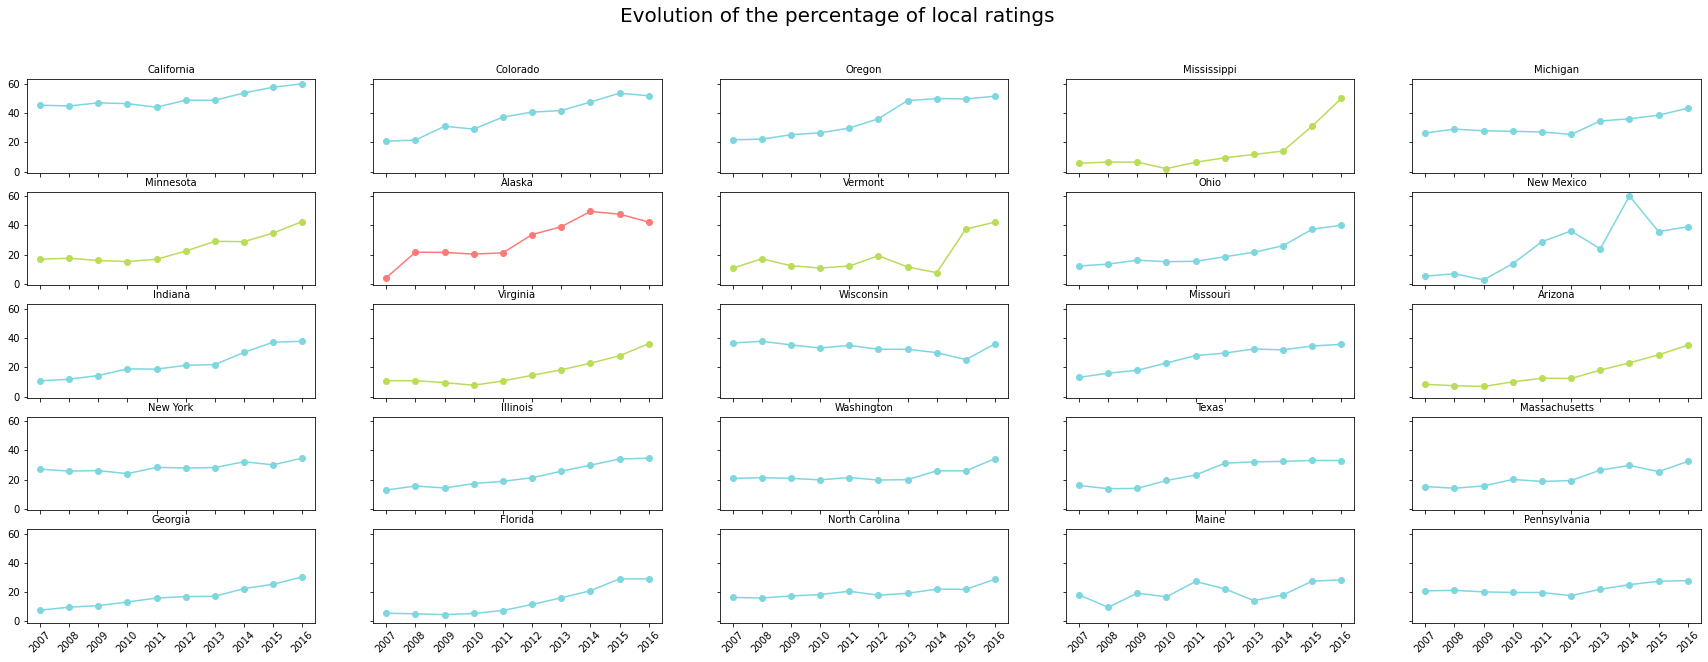

In [70]:
fig, axs = plt.subplots(5, 5, figsize=(30,10), sharex=True, sharey=True)
fig.suptitle('Evolution of the percentage of local ratings', fontsize=20)

for i, state in enumerate(counts_local_df2_ev.index):
    # Get the info on the plot
    row = i // 5
    col = i % 5
    subplot = axs[row, col]
    
    # Get the list of points
    state_info = counts_local_df2_ev.iloc[i].values

    #Set the label 
    label = ' '.join(state.split()[2:])

    # Plot the percentage of breweries rated 
    if label in ['Mississippi', 'Minnesota', 'Vermont', 'Virginia', 'Arizona'] : 
      subplot.plot(counts_local_df2_ev.columns, state_info, color=green, marker = 'o')
    elif label in ['Alaska'] : 
      subplot.plot(counts_local_df2_ev.columns, state_info, color=red, marker = 'o')
    else : 
      subplot.plot(counts_local_df2_ev.columns, state_info, color=blue, marker = 'o')

    plt.setp(subplot.get_xticklabels(), rotation=45)
    subplot.set_title(label, fontsize=10)

plt.show()

We can see here that the **percentage of ratings for local beers is increasing for most of the states**. In fact, **except for Alaska** where the percentage is slightly decreasing since 2014, we can now confirm that **Americans are turning more and more to local beers**. We therefore strongly support our client's idea to set up a local brewery. 

Some states are particularly catching our attention:     
- The states of **Vermont, Mississippi, Virginia, Massachusetts, Minnesota** with **very rapid growth since 2014** 
- The states of **California, Colorado, Oregon, Michigan, and Ohio** which are growing more slowly but are in the top 10 states with the highest percentage of local ratings in 2016 (between $40$% and $60$%). 
- The remaining states may still represent potential targets for our client.

In [71]:
top_10_local = top_10(counts_local_df, '2016(%)')
top_10_local = top_10_local.drop(columns = [year for year in range(2007,2017)])
top_10_local

year,2007(%),2008(%),2009(%),2010(%),2011(%),2012(%),2013(%),2014(%),2015(%),2016(%)
"United States, California",45.318458,44.781375,46.905061,46.355831,43.966933,48.713763,48.647170,53.680135,57.578069,59.912613
"United States, Colorado",20.782759,21.494182,30.942005,28.995999,37.196033,40.577994,41.645612,47.468080,53.529354,51.751362
"United States, Oregon",21.724660,22.111512,25.151325,26.436504,29.693878,36.071790,48.412846,49.857499,49.601276,51.425943
"United States, Mississippi",5.630027,6.504065,6.451613,2.000000,6.382979,9.395973,11.666667,14.035088,31.067961,50.000000
"United States, Michigan",26.305221,28.998459,27.834766,27.480133,27.014995,25.355040,34.493042,36.055777,38.462327,43.288591
"United States, Minnesota",16.947354,17.627402,16.073753,15.336572,16.953461,22.496976,29.179104,28.930066,34.812881,42.667534
"United States, Alaska",4.347826,21.739130,21.594069,20.436508,21.311475,33.742331,39.108062,49.532710,47.717231,42.340628
"United States, Vermont",10.833333,17.269076,12.488769,10.950081,12.256267,19.361702,11.669129,7.766990,37.547893,42.261529
"United States, Ohio",12.315177,13.630301,16.299443,15.254753,15.540123,18.645963,21.652220,26.160660,37.406664,40.123239
"United States, New Mexico",5.369128,7.011070,2.884615,13.888889,28.934010,36.231884,24.000000,60.154242,35.810811,39.090909


In [72]:
res_df['Percentage local'] = [0 for i in range(res_df.shape[0])]
for name in ['Vermont', 'Mississippi', 'Virginia', 'Massachusetts', 'Minnesota', 'California', 'Colorado', 'Oregon', 'Michigan', 'Ohio'] :
  res_df.at[name_to_index['United States, ' + name], 'Percentage local'] = 2

for name in ['New Mexico', 'Indiana', 'Wisconsin', 'Missouri', 'New York', 'Illinois', 'Washington', 'Texas', 'Massachusetts', 'Georgia', 'Florida', 'North Carolina', 'Maine', 'Pennsylvania'] : 
  res_df.at[name_to_index['United States, ' + name], 'Percentage local'] = 1

for name in ['Alaska'] :
  res_df.at[name_to_index['United States, ' + name], 'Percentage local'] = -1

#### **Where are the real beer fans who make a lot of ratings ?**

To identify the states where the most passionate and engaged beer enthusiasts are located, we will analyze the ratio of number of ratings to number of users and the average number of ratings per user in each state using data from Rate Beer. This will allow us to determine which states have the most dedicated and active users, and therefore the most potential for building a strong community around our client's brewery. We will focus on Rate Beer due to its higher number of experienced users. By targeting these states, our client can establish their brewery in a location where they are likely to find an engaged and supportive customer base.

In [73]:
#Average rating per user 
avg_rating_state = []
#For each state 
for state in countries_US : 
  #Retrieve the ratings from that state 
  ratings_per_state = ratings_rb_from_US.loc[ratings_rb_from_US['loc_user'] == state]
  
  #Group by user id and take the mean 
  ratings_per_state_user = np.mean(ratings_per_state.groupby('user_id').beer_id.count().values)

  avg_rating_state.append(ratings_per_state_user)

In [74]:
#Count the number of ratings per state 
ratings_per_state = ratings_rb_from_US.groupby('loc_user').beer_id.count()
ratings_by_state_df = pd.DataFrame({'state' : ratings_per_state.index, 'nb_ratings' : ratings_per_state.values})
ratings_by_state_df = add_state_code(ratings_by_state_df)

#Add the number of users per state 
ratings_by_state_df['nb_users'] = users_by_state_df.nb_users.values

#Add the ratio nb_ratings/nb_users
ratings_by_state_df['ratio'] = ratings_by_state_df['nb_ratings']/ratings_by_state_df['nb_users']

#Add the mean of ratings per user 
ratings_by_state_df['avg_ratings'] = avg_rating_state
#Plot the number of users per state
plot_map(ratings_by_state_df, 'ratio')

In [75]:
top_10_ratings_per_user = top_10(ratings_by_state_df, 'ratio')
top_10_ratings_per_user

,state,nb_ratings,state_code,nb_users,ratio,avg_ratings
11,"United States, Idaho",30651,ID,400,76.627500,239.460938
27,"United States, Nevada",19779,NV,620,31.901613,156.976190
5,"United States, Colorado",93508,CO,3100,30.163871,132.635461
46,"United States, Washington",111554,WA,3867,28.847686,125.623874
2,"United States, Arizona",49815,AZ,1826,27.280942,110.454545
41,"United States, Tennessee",42048,TN,1645,25.561094,142.054054
43,"United States, Utah",10255,UT,405,25.320988,101.534653
22,"United States, Minnesota",91516,MN,3622,25.266703,126.753463
48,"United States, Wisconsin",75686,WI,3213,23.556178,95.805063
36,"United States, Oregon",49880,OR,2201,22.662426,92.370370


The state of Idaho has the highest ratio of number of ratings to number of users, with an average of 240 ratings per user. Although it has a lower number of ratings overall, its small number of users (400) makes it a state with very active beer consumers. Arizona and Tennessee also have a high average of ratings per user, but fewer total ratings. On the other hand, Colorado, Washington, and Minnesota have a very active beer community, with around 93,500, 111,500, and 91,500 ratings respectively and an average of around 125-132 ratings per user. We recommend that our client consider these three states, as well as Idaho, Arizona, and Tennessee, as they have a strong and invested beer community.

In [76]:
res_df['Ratings per user'] = [0 for i in range(res_df.shape[0])]
for name in ['Washington', 'Colorado', 'Minnesota'] :
  res_df.at[name_to_index['United States, ' + name], 'Ratings per user'] = 2

for name in ['Idaho', 'Arizona', 'Tennessee'] : 
  res_df.at[name_to_index['United States, ' + name], 'Ratings per user'] = 1

In [77]:
total_column = []
for index, row in res_df.iterrows() : 
  total=0
  for column in res_df.columns[1:] : 
    total +=  row[column]
  total_column.append(total)

res_df['Total score'] = total_column

res_part1 = res_df.loc[res_df['Total score'] > 0]
res_part1 = res_part1.sort_values('Total score', ascending = False)
res_part1['state'] = res_part1.state.apply(lambda x : x.split(',')[1])
print(len(res_part1), 'potential states to locate the brewery')

21 potential states to locate the brewery


In [78]:
res_part1 = res_df.loc[res_df['Total score'] > 0]
res_part1 = res_part1.sort_values('Total score', ascending = False)
res_part1['state'] = res_part1.state.apply(lambda x : x.split(',')[1])
print(len(res_part1), 'potential states to locate the brewery')

21 potential states to locate the brewery


If we aggregate the results of the selection criteria mentioned thus far (large market share, low competition, high engagement of consumers, preference for local beers) we end up with the following ranking of states:

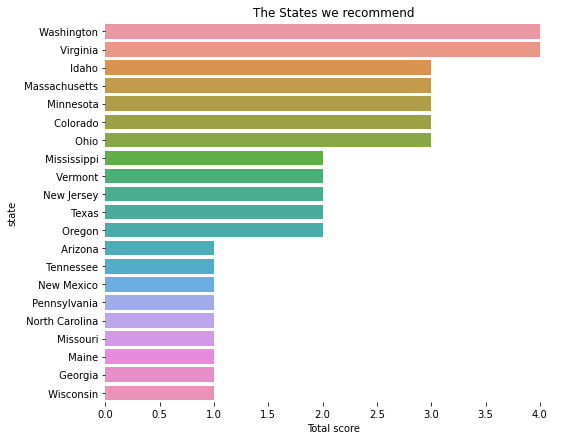

In [79]:
plt.figure(figsize=(8,6))

sns.set_color_codes("pastel")
sns.barplot(x="Total score", y="state", data=res_part1, label="Number of ratings")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.title('The States we recommend')
plt.show()


### **Which breweries are our client's competitors?**

After investigating user behavior by state in detail, we will now complete our market research by ***focusing on our client's potential competitors***. 

We will filter the breweries according to the following criteria: 
- We **remove breweries** from the **states with a total score of 0**.  By eliminating breweries located in states with a low score, we can focus on markets that are more likely to be viable for our client's brewery. This will help to ensure that our analysis is more accurate and relevant, as it will exclude areas that may not be attractive to our client.

- We **remove the breweries** which **don't have ratings in 2016/2017**. We want to consider only competitors that are still in the market. Since the latest date available in the dataset is in 2017, we will remove all breweries that stopped receiving reviews prior to that date. 

- We **keep** only the breweries of the **same size as our client**. By limiting our analysis to breweries that are the same size as our client, we can more accurately compare their capabilities and resources. This will allow us to identify potential competitors that may be more evenly matched with our client in terms of production capacity and market presence.

- We **remove the breweries** that have a **very low number of ratings**. Breweries with a low number of ratings may not be well-established or popular, and therefore may not pose a significant threat to our client. By removing these breweries from our analysis, we can focus on more relevant competitors that are more likely to be viable threats to our client.

Then, we will study some **characteristics of the breweries** to determine ***which ones could be our client's potential competitors***, while continuing to **score the states** to select at the end only the *best state* to install our client's brewery

Note that we will focus on Rate Beer as the number of breweries is much more important than on Beer Advocate. 


#### **Filter the breweries**

First, we filter breweries to only **keep the ones which could be potential competitors**. 


In [80]:
#First we only keep the breweries which have still some ratings in 2016/2017 
actual_breweries = first_last_years_df.loc[first_last_years_df['last_year'].isin([2016,2017])].brewery_id.values.tolist()
breweries_rb_filtered = breweries_rb.loc[breweries_rb['id'].isin(actual_breweries)]
beers_rb_filtered = beers_rb.loc[beers_rb['brewery_id'].isin(actual_breweries)]
ratings_rb_filtered = ratings_overview_rb.loc[ratings_overview_rb['brewery_id'].isin(actual_breweries)]

print(breweries_rb.shape[0] - breweries_rb_filtered.shape[0], ' breweries out')

1780  breweries out


In [81]:
#Then we remove the breweries from the states which don't have a zero total score 
states_in = res_df.loc[res_df['Total score'] > 0].state.values.tolist()
breweries_rb_filtered2 = breweries_rb_filtered.loc[breweries_rb_filtered['location'].isin(states_in)]

actual_breweries2 = breweries_rb_filtered2.id.values.tolist()

beers_rb_filtered2 = beers_rb_filtered.loc[beers_rb_filtered['brewery_id'].isin(actual_breweries2)]
ratings_rb_filtered2 = ratings_rb_filtered.loc[ratings_rb_filtered['brewery_id'].isin(actual_breweries2)]

print(breweries_rb_filtered.shape[0] - breweries_rb_filtered2.shape[0], ' breweries out')

2376  breweries out


In [82]:
#We filter out breweries with more than 50 beers
breweries_rb_filtered3 = breweries_rb_filtered2.loc[breweries_rb_filtered2['nbr_beers'] <= 30]

actual_breweries3 = breweries_rb_filtered3.id.values.tolist()

ratings_rb_filtered3 = ratings_rb_filtered2.loc[ratings_rb_filtered2['brewery_id'].isin(actual_breweries3)]
beers_rb_filtered3 = beers_rb_filtered2.loc[beers_rb_filtered2['brewery_id'].isin(actual_breweries3)]

print(breweries_rb_filtered2.shape[0] - breweries_rb_filtered3.shape[0], 'breweries out')

1169 breweries out


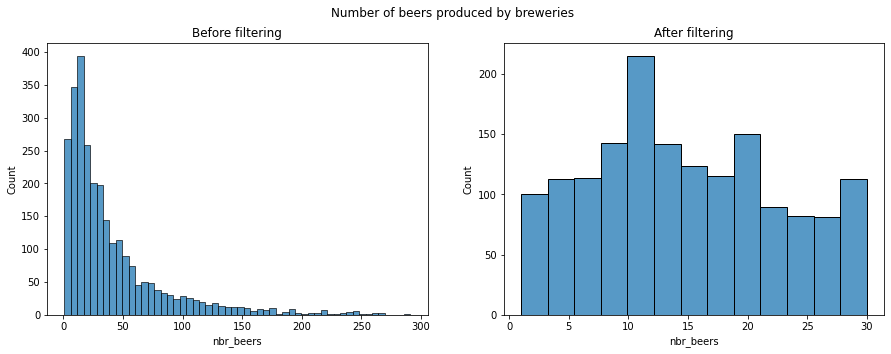

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Number of beers produced by breweries')

# Before
sns.histplot(ax=axes[0], data=breweries_rb_filtered2, x = 'nbr_beers')
axes[0].set_title('Before filtering')

# After
sns.histplot(ax=axes[1], data=breweries_rb_filtered3, x = 'nbr_beers')
axes[1].set_title('After filtering')

plt.show()

In [84]:
#Number of ratings per brewery 
ratings_per_brewery = ratings_rb_filtered3.groupby('brewery_id').beer_id.count()
ratings_per_brewery.describe()

count    1582.000000
mean       71.085335
std       225.439204
min         1.000000
25%         8.000000
50%        23.000000
75%        57.000000
max      6156.000000
Name: beer_id, dtype: float64

**50% of the breweries have only 23 ratings**. These breweries **do not appear to be potential competitors**. Therefore, we will only keep the breweries whose number of ratings is higher than the 75%-quantile, i.e. 57 ratings. 

In [85]:
#List of breweries we are keeping
ratings_per_brewery_df = pd.DataFrame({'id' : ratings_per_brewery.index, 'count' : ratings_per_brewery.values})
actual_breweries4 = ratings_per_brewery_df.loc[ratings_per_brewery_df['count'] >= 57].id.values.tolist()

breweries_rb_filtered4 = breweries_rb_filtered3.loc[breweries_rb_filtered3['id'].isin(actual_breweries4)]
ratings_rb_filtered4 = ratings_rb_filtered3.loc[ratings_rb_filtered3['brewery_id'].isin(actual_breweries4)]
beers_rb_filtered4 = beers_rb_filtered3.loc[beers_rb_filtered3['brewery_id'].isin(actual_breweries4)]

print(breweries_rb_filtered3.shape[0] - breweries_rb_filtered4.shape[0], 'breweries out')

1177 breweries out


In [86]:
print(breweries_rb_filtered4.shape[0], 'potential concurrents')

405 potential concurrents


In [87]:
concurrents_per_state = breweries_rb_filtered4.groupby('location').id.count().values
res_part1['Concurrent breweries'] = concurrents_per_state

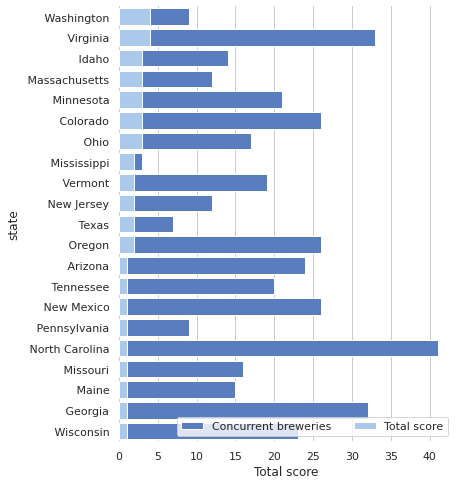

In [88]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 8))

sns.set_color_codes("muted")
sns.barplot(x="Concurrent breweries", y="state", data=res_part1,
            label="Concurrent breweries", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="Total score", y="state", data=res_part1,
            label="Total score", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

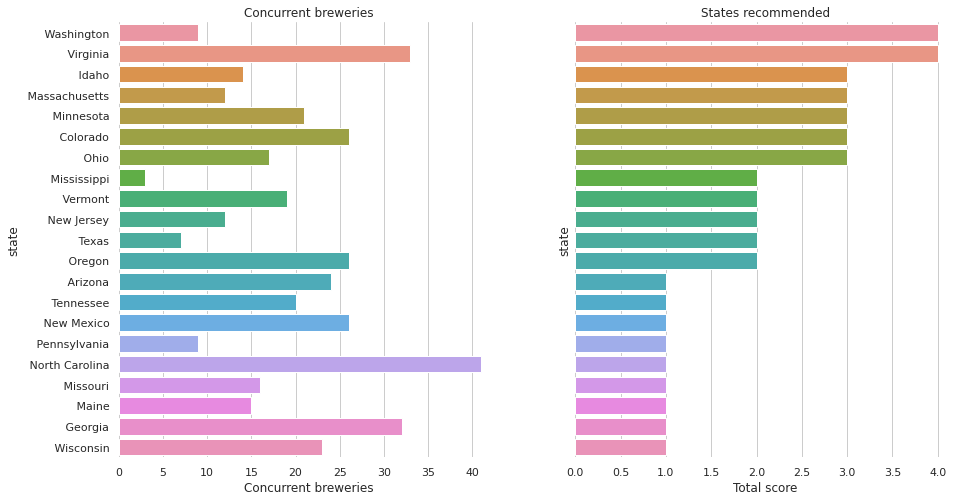

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Before
sns.barplot(ax = axes[0], x="Concurrent breweries", y="state", data=res_part1,
            label="Concurrent breweries")
axes[0].set_title('Concurrent breweries')
sns.despine(left=True, bottom=True)

# After
sns.barplot(ax = axes[1], x="Total score", y="state", data=res_part1,
            label="Total score")
axes[1].set_title('States recommended')

plt.show()

The plot above shows the results of our market research. 
On the left you can see the **number of potential competitors** for our client for each *state whose total score is strictly greater than 0*. 
On the right is the **ranking of the states according to the total score** which corresponds to the *sum of the scores* obtained on the following criteria: 
- **Number of users**: a *high* number of users and therefore a *potential market to reach*
- **Number of users / Number of breweries** : a *low ratio* and therefore a *market not saturated*, with *less competition* 
- **Evolution of the number of users** : a *fast evolution since few years* and a public which is getting more and more interested in beer 
- **Evolution of the percentage of ratings on local beers**: a *fast evolution* and consumers who are more and more attached to the local character. A potential target for our client. 
- **Average number of ratings per user**: a fairly *high number* and therefore a *strong community* of beer lovers who would be interested in our client's products. 



Based on these insights, we are now able to determine the **3 most favorable states for our client's brewery location**. 

**Washington** has the highest total score and the number of competitors is very low. So we choose this state without much hesitation. 

**Virginia** has also the highest score, but there are many competitors in the area. However, we will still choose this state and study in details what kind of beers are offered by the breweries in this state. The market could in fact be segmented and our client may succeed knowing that a strong community of beer lovers is located in this state

Among the states with a total score equal to 3, we select **Massachussets** beacause of the low number of competitors. 

🏆 **Washington, Virginia, Massachusetts**

####**Leading breweries in the 3 recommended states**

Now that we have chosen 3 potential states where our client could set up his brewery, let's determine ***who are the potential competitors of our client in each of these states***. To do this, we will use **4 criteria**.  

Which breweries : 

- are the **most popular** with the **highest number of ratings**
- have been established in the area for a long time with the **longest period since the first rating** 
- are the **local breweries** with the **highest percentage of ratings** within the state

By examining these different criteria, we will **assign scores to each brewery** and then determine **which ones are the strongest on the market** and therefore **which breweries represent the biggest competitors** of our client. 

In parallel, we are going to **compare the 3 states retained** to finally **retain one** for the next part of our work. 


##### **Prepare data**

In [90]:
#First we filter datasets to only keep breweries from the 3 recommended states 
states = ['United States, Washington', 'United States, Virginia', 'United States, Massachusetts']

breweries_ids_selected = breweries_rb_filtered4.loc[breweries_rb_filtered4['location'].isin(states)].id.values

breweries_rb_selected = breweries_rb_filtered4.loc[breweries_rb_filtered4['id'].isin(breweries_ids_selected)]
ratings_rb_selected = ratings_rb_filtered4.loc[ratings_rb_filtered4['brewery_id'].isin(breweries_ids_selected)]
beers_rb_selected = beers_rb_filtered4.loc[beers_rb_filtered4['brewery_id'].isin(breweries_ids_selected)]

print(breweries_rb_filtered4.shape[0] - breweries_rb_selected.shape[0], 'breweries out')
print(breweries_rb_selected.shape[0], 'potential concurrents')

332 breweries out
73 potential concurrents


In [91]:
#Define datasets concerning each of the 3 states
breweries_rb_selected = breweries_rb_selected.rename(columns = {'id' : 'brewery_id'})

#Washington 
breweries_w = breweries_rb_selected.loc[breweries_rb_selected['location'] == 'United States, Washington']
ratings_w = ratings_rb_selected.loc[ratings_rb_selected['loc_brewery'] == 'United States, Washington']
beers_w = beers_rb_selected.loc[beers_rb_selected['location'] == 'United States, Washington']

#Virginia 
breweries_v = breweries_rb_selected.loc[breweries_rb_selected['location'] == 'United States, Virginia']
ratings_v = ratings_rb_selected.loc[ratings_rb_selected['loc_brewery'] == 'United States, Virginia']
beers_v = beers_rb_selected.loc[beers_rb_selected['location'] == 'United States, Virginia']

#Massachusetts
breweries_m = breweries_rb_selected.loc[breweries_rb_selected['location'] == 'United States, Massachusetts']
ratings_m = ratings_rb_selected.loc[ratings_rb_selected['loc_brewery'] == 'United States, Massachusetts']
beers_m = beers_rb_selected.loc[beers_rb_selected['location'] == 'United States, Massachusetts']

In [92]:
def mapping_id_to_index(breweries) : 
  """Create a mapping from brewery_id to row index""" 
  id_to_index = dict()
  cpt = 0
  for index, row in breweries.iterrows() : 
    id_to_index[row['brewery_id']] = cpt 
    cpt += 1
  return id_to_index

id_to_index_w = mapping_id_to_index(breweries_w)
id_to_index_v = mapping_id_to_index(breweries_v)
id_to_index_m = mapping_id_to_index(breweries_m)

In [93]:
def create_res_df(breweries) : 
  """Define a dataframe which will contain the scores of each brewery""" 
  res_breweries = pd.DataFrame({  'name' : breweries.name.values.tolist(), 
                                  'id' : breweries.brewery_id.values.tolist(),
                                  'nb_ratings' : [0 for i in range(breweries.shape[0])],
                                  'avg_ratings' : [0 for i in range(breweries.shape[0])],
                                  'nb_years_since_first_rating' : [0 for i in range(breweries.shape[0])], 
                                  'percentage_local_users': [0 for i in range(breweries.shape[0])]
                                })
  return res_breweries

res_breweries_w = create_res_df(breweries_w)
res_breweries_v = create_res_df(breweries_v)
res_breweries_m = create_res_df(breweries_m)

In [94]:
#Retrieve the results from the previous part
res_part2 = res_part1.iloc[[0,1,3]]

In [95]:
res_part2

,state,Users & Breweries,Evolution users,Percentage local,Ratings per user,Total score,Concurrent breweries
46,Washington,0,1,1,2,4,9
45,Virginia,0,2,2,0,4,33
20,Massachusetts,1,1,1,0,3,12


##### **Highest number of ratings**

We'll start by determining ***which breweries are the most popular in each state*** by determining the **total number of ratings per brewery**. 

In [96]:
def most_popular_breweries(ratings, breweries) : 
  """Returns a DataFrame containing the 10 breweries with the highest number of ratings"""
  #Count the number of ratings per brewery
  ratings_per_brewery = ratings.groupby('brewery_id').beer_id.count()
  ratings_per_brewery_df = pd.DataFrame({'brewery_id' : ratings_per_brewery.index, 
                                         'nb_ratings' : ratings_per_brewery.values})
  #Keep the columns we are interested in
  breweries_tmp = breweries[['name', 'brewery_id']]

  #Retrieve the name of the brewery
  ratings_per_brewery_df = ratings_per_brewery_df.merge(breweries_tmp, how='inner', on = 'brewery_id')
  
  #Retrieve the breweries with the highest number of ratings
  ratings_per_brewery_df.sort_values('nb_ratings', ascending=False, inplace=True)
  top_10_popular = ratings_per_brewery_df.head(10)

  return top_10_popular

# Creating autocpt arguments
def func(pct, allvalues, kind_plot):
  """For the displaying on the pie chart"""
  if kind_plot == 'i' : 
      absolute = int(pct / 100.*np.sum(allvalues))
      return "{:d}".format(absolute)
  if kind_plot == 'f' : 
      absolute = pct / 100.*np.sum(allvalues)
      return "{:.2f}".format(absolute)
  if kind_plot == 'per' : 
      absolute = pct / 100.*np.sum(allvalues)
      return "{:.2f}%".format(absolute)

def plot_pie_chart(column_to_plot, column_label, title, kind_plot) : 
  """Plot a pie chart"""
  plt.figure(figsize = (8, 8))
  colors = sns.color_palette('pastel')
  plt.pie(x=column_to_plot, autopct=lambda pct: func(pct, column_to_plot, kind_plot), explode=[0.05]*10, labels=column_label, pctdistance=0.5, colors = colors)
  plt.title(title, fontsize=15)
  plt.show()

In [97]:
#Find the top 10 breweries with the highest number of ratings
top_10_popular_w = most_popular_breweries(ratings_w, breweries_w)
top_10_popular_v = most_popular_breweries(ratings_v, breweries_v)
top_10_popular_m = most_popular_breweries(ratings_m, breweries_m)

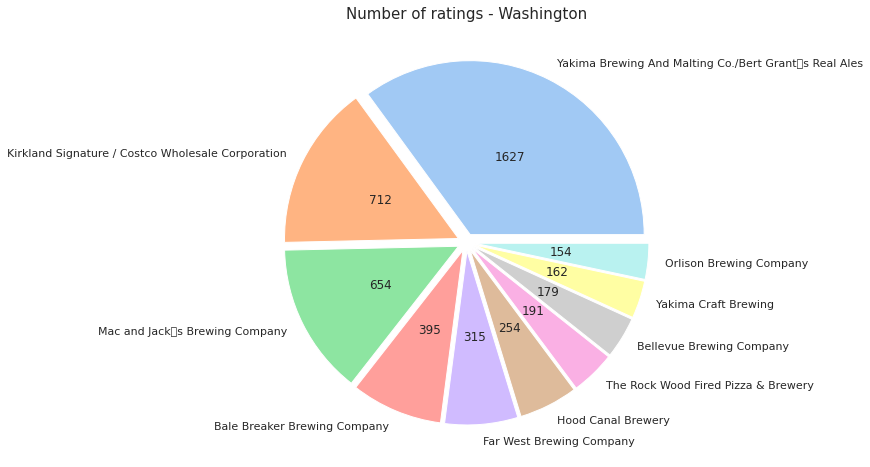

In [98]:
#Plot the pie charts
plot_pie_chart(top_10_popular_w.nb_ratings, top_10_popular_w.name, 'Number of ratings - Washington', 'i')

The 3 breweries with the highest number of comments dominate by far the other breweries in the top 10, and are the breweries to watch. **Yakima Brewing and Malting Co.** is far ahead of its competitors with **1,627 ratings**, twice as many as the brewery just behind it. 


In [99]:
#Add the score to the res DataFrame : 
cpt = 0
for index, row in top_10_popular_w.iterrows() : 
  id = row['brewery_id']
  if cpt == 0 : 
    res_breweries_w.at[id_to_index_w[id], 'nb_ratings'] = 5
  if cpt in [1,2] : 
    res_breweries_w.at[id_to_index_w[id], 'nb_ratings'] = 3
  if cpt in [3, 4, 5] : 
    res_breweries_w.at[id_to_index_w[id], 'nb_ratings'] = 2
  else : 
    res_breweries_w.at[id_to_index_w[id], 'nb_ratings'] = 1
  cpt += 1

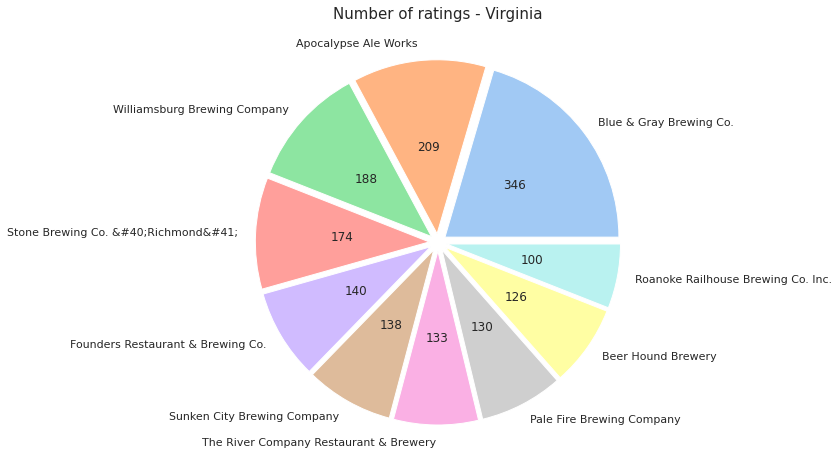

In [100]:
plot_pie_chart(top_10_popular_v.nb_ratings, top_10_popular_v.name, 'Number of ratings - Virginia', 'i')

The distribution of the **number of ratings is more uniform** among the breweries here. This is not surprising, as this is the state with the most breweries in the country (33 breweries) and therefore fewer market leaders like in Washington. Howewer, we can note that Blue & Gray Brewing Co. slightly dominates the market. 

In [101]:
#Add the score to the res DataFrame
cpt = 0
for index, row in top_10_popular_v.iterrows() : 
  id = row['brewery_id']
  if cpt == 0 : 
    res_breweries_v.at[id_to_index_v[id], 'nb_ratings'] = 3
  if cpt in [1, 2, 3] : 
    res_breweries_v.at[id_to_index_v[id], 'nb_ratings'] = 2
  else : 
    res_breweries_v.at[id_to_index_v[id], 'nb_ratings'] = 1
  cpt += 1

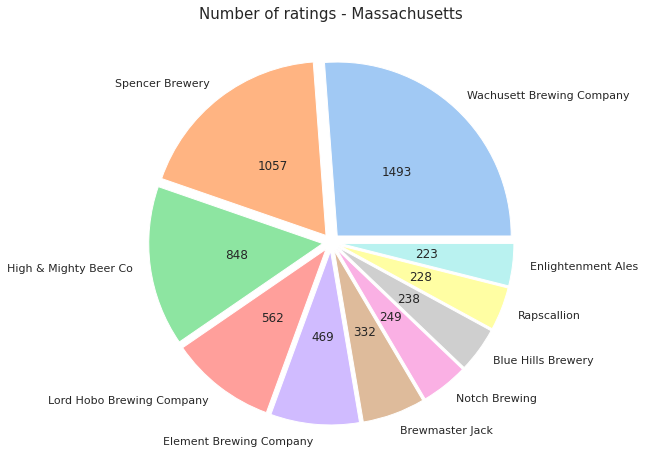

In [102]:
plot_pie_chart(top_10_popular_m.nb_ratings, top_10_popular_m.name, 'Number of ratings - Massachusetts', 'i')

The **top 3 breweries** here share **more than half of the total number of ratings of the 10 most popular breweries**, and are therefore the breweries to watch. 

In [103]:
#Add the score to the res DataFrame
cpt = 0
for index, row in top_10_popular_m.iterrows() : 
  id = row['brewery_id']
  if cpt == 0 : 
    res_breweries_m.at[id_to_index_m[id], 'nb_ratings'] = 5
  if cpt == 1 : 
    res_breweries_m.at[id_to_index_m[id], 'nb_ratings'] = 4
  if cpt == 2 : 
    res_breweries_m.at[id_to_index_m[id], 'nb_ratings'] = 3
  if cpt in [3, 4] : 
    res_breweries_m.at[id_to_index_m[id], 'nb_ratings'] = 2
  else : 
    res_breweries_m.at[id_to_index_m[id], 'nb_ratings'] = 1
  cpt += 1

Following the analysis of the number of ratings per brewery for each state, we can observe that there are generally **fewer ratings per brewery in Virginia**: the **most popular brewery** has only **346 ratings**, while this number is **much higher in Massachusetts (1627) and Virginia (1493)**. This means that there are fewer breweries dominating the market. The sector will be **less competitive** for our client, which is a positive point. 

Let's continue to fill the table containing the scores determined through our analysis. We recommend the state of Virginia for this criterion since it is the state with the least number of popular competitors (high number of ratings).


In [104]:
res_part2['Concurrents - nbr_ratings'] = [-1, 1, -1]
res_part2

,state,Users & Breweries,Evolution users,Percentage local,Ratings per user,Total score,Concurrent breweries,Concurrents - nbr_ratings
46,Washington,0,1,1,2,4,9,-1
45,Virginia,0,2,2,0,4,33,1
20,Massachusetts,1,1,1,0,3,12,-1


##### **Number of years since the first rating**

In this analysis, we will identify breweries that are well-established in the market and have a reputation for quality among consumers. We will focus on breweries that have the most years of experience, as these are likely to have a strong presence in the market and be well-known by consumers. By identifying these breweries, we can better understand the competitive landscape and determine which ones may pose the greatest threat to our client's success.

In [105]:
def years_since_first_review(breweries) : 
  """Returns a DataFrame containing the 10 breweries which have the longest period between first review and now"""
  #Breweries we are keeping
  breweries_ids = breweries.brewery_id.values.tolist()

  #Retrieve first and last years of ratings for each brewery
  first_last_years = first_last_years_df[first_last_years_df['brewery_id'].isin(breweries_ids)]

  #Add a column which contains the difference between last year and first year 
  first_last_years['diff'] = first_last_years['last_year'] - first_last_years['first_year']
  years_df = pd.DataFrame({'brewery_id' : first_last_years.brewery_id.values.tolist(), 
                            'diff' : first_last_years['diff'].values.tolist()
                          })
  
  #Keep the columns we are interested in
  breweries_tmp = breweries[['name', 'brewery_id']]

  #Retrieve the name of the brewery
  years_df = years_df.merge(breweries_tmp, how='inner', on = 'brewery_id')
  
  #Retrieve the breweries with the highest avg rating
  years_df.sort_values('diff', ascending=False, inplace=True)
  top_10_years = years_df.head(10)

  return top_10_years

In [106]:
#Find the top 10 breweries with the highest number of ratings
top_10_years_w = years_since_first_review(breweries_w)
top_10_years_v = years_since_first_review(breweries_v)
top_10_years_m = years_since_first_review(breweries_m)

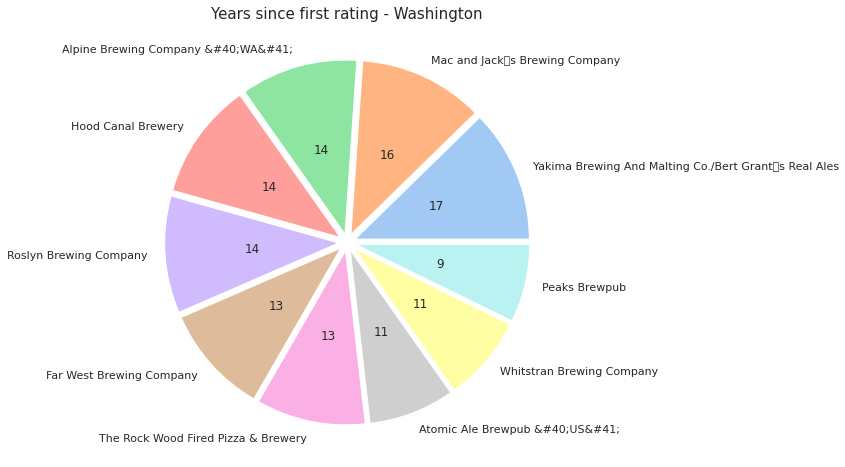

In [107]:
plot_pie_chart(top_10_years_w['diff'], top_10_years_w.name, 'Years since first rating - Washington', 'i')

The oldest breweries in the comments have a significant amount of experience, with the first one having been in the area for 17 years and the second one for 16 years. The next three breweries have been in the area for 14 years. These breweries are well-established and may be considered institutions in Washington. Additionally, the large number of established breweries in the area may make it more difficult for new breweries to gain a foothold, as consumers may be more inclined to visit established breweries out of habit. As such, these breweries may pose a real threat to our client as potential competitors.

In [108]:
#Add the score to the res DataFrame
cpt = 0
for index, row in top_10_years_w.iterrows() : 
  id = row['brewery_id']
  if cpt in [i for i in range(5)] : 
    res_breweries_w.at[id_to_index_w[id], 'nb_years_since_first_rating'] = 3
  else :
    res_breweries_w.at[id_to_index_w[id], 'nb_years_since_first_rating'] = 2
  cpt += 1

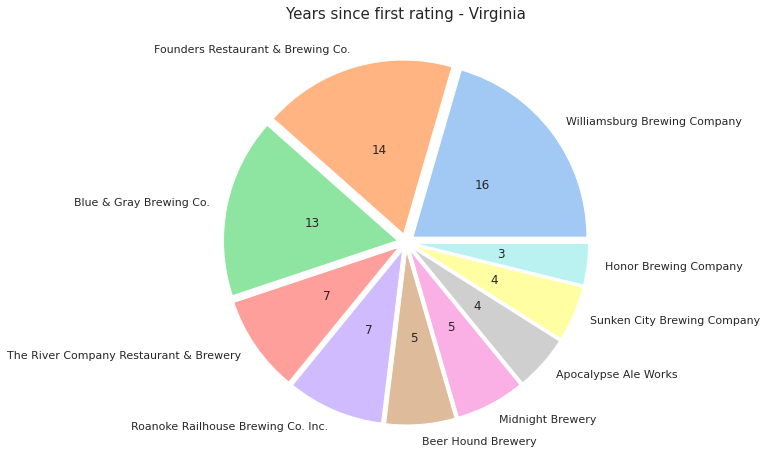

In [109]:
plot_pie_chart(top_10_years_v['diff'], top_10_years_v.name, 'Years since first rating - Virginia', 'i')

In Virginia, there is a greater difference between long-established breweries and newer breweries than there is in Washington. The top three breweries in Virginia have been in the reviews for 16, 14, and 13 years, respectively, while the 10th brewery has only been rated for 3 years. This indicates that most of the breweries in Virginia are relatively new, with only 5 of the 33 breweries having been in the comments for more than 7 years. Despite having the largest number of potential competitors among the states we analyzed, Virginia also has the highest score in terms of the evolution of the number of users over the years. This suggests that there may be more room for new breweries to succeed in Virginia compared to Washington, and that our client may be able to find a place in the market more easily in this state.

In [110]:
#Add the score to the res DataFrame
cpt = 0
for index, row in top_10_years_v.iterrows() : 
  id = row['brewery_id']
  if cpt in [i for i in range(3)] : 
    res_breweries_v.at[id_to_index_v[id], 'nb_years_since_first_rating'] = 3
  else :
    res_breweries_v.at[id_to_index_v[id], 'nb_years_since_first_rating'] = 1
  cpt += 1

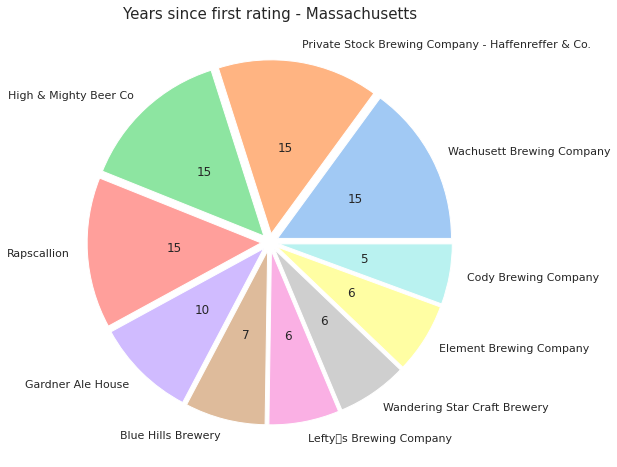

In [111]:
plot_pie_chart(top_10_years_m['diff'], top_10_years_m.name, 'Years since first rating - Massachusetts', 'i')

In Massachusetts, **4 breweries** are present in the comments since **15 years** and dominate the other breweries in the top 10. Except for Gardner Ale House, the period since the first rating is twice as long as in the other breweries. 

We find the **same pattern as in Virginia**, with only 5 breweries appearing in the comments for more than 10 years. These are the ones to watch, but the ***market is quite favorable for our client***. 

In [112]:
#Add the score to the res DataFrame
cpt = 0
for index, row in top_10_years_m.iterrows() : 
  id = row['brewery_id']
  if cpt in [i for i in range(4)] : 
    res_breweries_m.at[id_to_index_m[id], 'nb_years_since_first_rating'] = 3
  if cpt == 5 : 
    res_breweries_m.at[id_to_index_m[id], 'nb_years_since_first_rating'] = 2
  else :
    res_breweries_m.at[id_to_index_m[id], 'nb_years_since_first_rating'] = 1
  cpt += 1

There are a **large number of long-established breweries in Washington**. We do **not recommend** this state because the **competition** could be tough. This number is **lower in Virginia and Massachusetts**, which seems to be more suitable for our client.

In [113]:
#Add scores to each state
res_part2['Concurrents - years since 1st review'] = [-1, 1, 1]
res_part2

,state,Users & Breweries,Evolution users,Percentage local,Ratings per user,Total score,Concurrent breweries,Concurrents - nbr_ratings,Concurrents - years since 1st review
46,Washington,0,1,1,2,4,9,-1,-1
45,Virginia,0,2,2,0,4,33,1,1
20,Massachusetts,1,1,1,0,3,12,-1,1


##### **Which are the local breweries ?**

In [114]:
def most_popular_breweries(breweries) : 
  """Returns a DataFrame containing the 10 breweries with the highest percentage of local ratings"""
  breweries_ids = breweries.brewery_id.values.tolist()
  local_df_tmp = local_df.loc[local_df['brewery_id'].isin(breweries_ids)]
  us_df_tmp = us_df.loc[us_df['brewery_id'].isin(breweries_ids)]

  #Count the number of local ratings per brewery
  local_per_brewery = local_df_tmp.groupby('brewery_id').beer_id.count().to_dict()

  #Count the number of ratings from US per brewery
  us_per_brewery = us_df_tmp.groupby('brewery_id').beer_id.count().to_dict()

  #Add 0 if there is no local ratings
  for key, value in us_per_brewery.items() :
    if key not in local_per_brewery :
      local_per_brewery[key] = 0
  
  local_per_brewery = dict(sorted(local_per_brewery.items()))
  us_per_brewery = dict(sorted(us_per_brewery.items()))

  assert(len(local_per_brewery) == len(us_per_brewery))

  local_per_brewery_df = pd.DataFrame({'brewery_id' : us_per_brewery.keys(), 
                                    'nb_local' : local_per_brewery.values(), 
                                    'nb_us' : us_per_brewery.values()
                                    })
  local_per_brewery_df['percentage_local'] = 100 * local_per_brewery_df['nb_local'] / local_per_brewery_df['nb_us']

  #Keep the columns we are interested in
  breweries_tmp = breweries[['name', 'brewery_id']]

  local_per_brewery_df = local_per_brewery_df[['brewery_id', 'percentage_local']]

  #Retrieve the name of the brewery
  local_per_brewery_df = local_per_brewery_df.merge(breweries_tmp, how='inner', on = 'brewery_id')

  #Retrieve the breweries with the highest avg rating
  local_per_brewery_df.sort_values('percentage_local', ascending=False, inplace=True)
  top_10_years = local_per_brewery_df.head(10)

  return top_10_years


In [115]:
#Find the top 10 breweries with the highest number of ratings
top_10_local_w = most_popular_breweries(breweries_w)
top_10_local_v = most_popular_breweries(breweries_v)
top_10_local_m = most_popular_breweries(breweries_m)

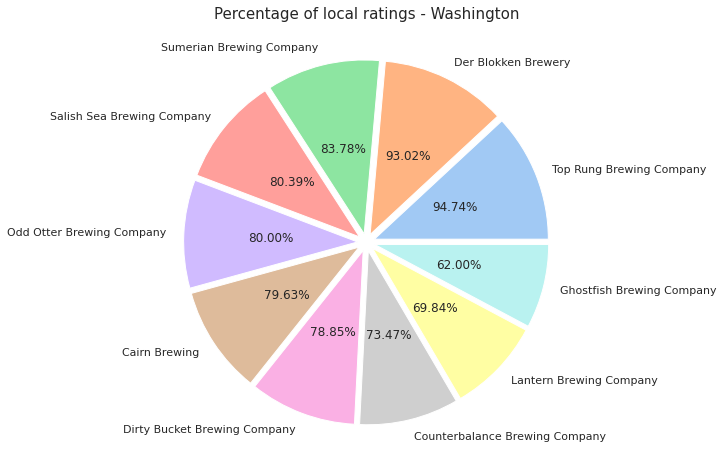

In [116]:
plot_pie_chart(top_10_local_w['percentage_local'], top_10_local_w.name, 'Percentage of local ratings - Washington', 'per')

The **percentage of local ratings is very high** for these 10 breweries, ranging from 62% for *Ghostfish Brewing Company* to almost 95% for *Top Rung Brewing Company*. This suggests an audience in Washington with a **preference for local beers**, which is very interesting for our client. 

In [117]:
#Add the score to the res DataFrame
cpt = 0
for index, row in top_10_local_w.iterrows() : 
  id = row['brewery_id']
  if cpt in [0, 1] : 
    res_breweries_w.at[id_to_index_w[id], 'percentage_local_users'] = 4
  if cpt == 2 : 
    res_breweries_w.at[id_to_index_w[id], 'percentage_local_users'] = 3
  if cpt in [i for i in range(3, 7)] : 
    res_breweries_w.at[id_to_index_w[id], 'percentage_local_users'] = 2
  else :
    res_breweries_w.at[id_to_index_w[id], 'percentage_local_users'] = 1
  cpt += 1

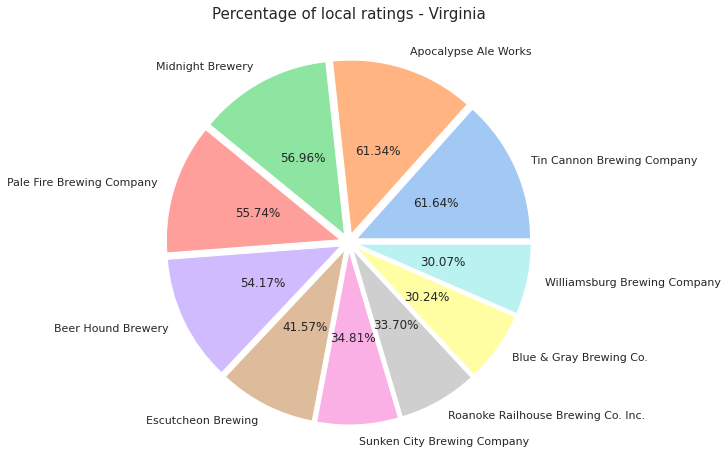

In [118]:
plot_pie_chart(top_10_local_v['percentage_local'], top_10_local_v.name, 'Percentage of local ratings - Virginia', 'per')

The **percentage of local ratings** is much **lower in Virginia than in Washington**. In fact, only 61% of the ratings are local for the first brewery, which is 1% less than the last brewery in the top 10 of Washington. 

However, the population in Virginia seems to be **more and more interested in local beers** as it has the **highest score for the evolution of the percentage of local ratings**. Our client could therefore position itself as a market leader with its brewery.


In [119]:
#Add the score to the res DataFrame
cpt = 0
for index, row in top_10_local_v.iterrows() : 
  id = row['brewery_id'] 
  if cpt in [0, 1, 2,3, 4] : 
    res_breweries_v.at[id_to_index_v[id], 'percentage_local_users'] = 2
  else :
    res_breweries_v.at[id_to_index_v[id], 'percentage_local_users'] = 1
  cpt += 1

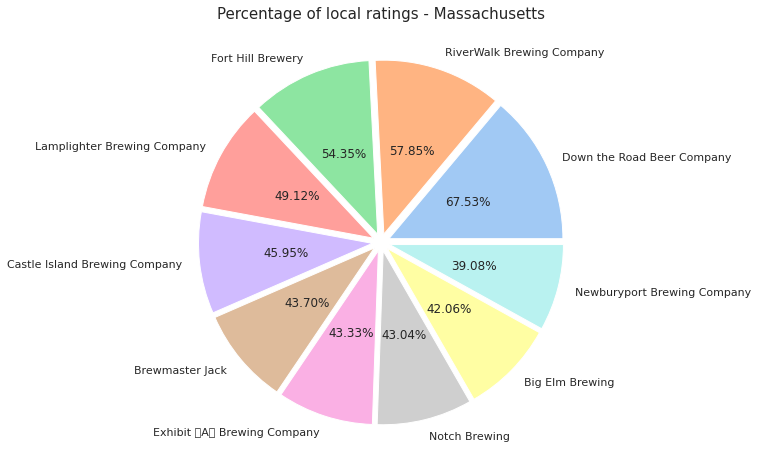

In [120]:
plot_pie_chart(top_10_local_m['percentage_local'], top_10_local_m.name, 'Percentage of local ratings - Massachusetts', 'per')

Similarly to Virginia, the **trend of local beers is less pronounced** than in Washington. Moreover, the percentage of local ratings is lower for the breweries in the top 10. *Down the Road Beer Company* still stands out among the other breweries. 

In [121]:
#Add the score to the res DataFrame
cpt = 0
for index, row in top_10_local_m.iterrows() : 
  id = row['brewery_id']
  if cpt == 0 : 
    res_breweries_m.at[id_to_index_m[id], 'percentage_local_users'] = 3
  if cpt in [1,2] : 
    res_breweries_m.at[id_to_index_m[id], 'percentage_local_users'] = 2
  else :
    res_breweries_m.at[id_to_index_m[id], 'percentage_local_users'] = 1
  cpt += 1

**Washington stands out** from the other two states with a **very high percentage of local ratings** for the 10 breweries in the top 10. Even though these breweries are potential competitors, there is a **very strong trend for local beer consumption** here and that is why we recommend this state.

In [122]:
#Add scores to each state
res_part2['Concurrents - percentage of local ratings'] = [2, 1, 1]
res_part2

,state,Users & Breweries,Evolution users,Percentage local,Ratings per user,Total score,Concurrent breweries,Concurrents - nbr_ratings,Concurrents - years since 1st review,Concurrents - percentage of local ratings
46,Washington,0,1,1,2,4,9,-1,-1,2
45,Virginia,0,2,2,0,4,33,1,1,1
20,Massachusetts,1,1,1,0,3,12,-1,1,1


#####**Results**

Finally, we analyze the results we obtained to :    


1.   Determine **which breweries are leaders in each state** according to the criteria studied: number of ratings, number of years since the first rating, percentage of local comments
2.   Find the **best state in which our client should locate its brewery** among Washington, Virginia and Massachusetts


In [123]:
def compute_total(res_df, is_state) :
  """Compute the total scores for each brewery""" 
  #If we compute the total score for the 3 recommended states
  if is_state : 
    #Drop initial total score and nb of breweries in the state 
    res_df = res_df.drop(columns = ['Concurrent breweries', 'Total score'], axis = 1)

  #If we compute the total score for the breweries within the state
  else : 
    #Drop columns name and id
    res_df = res_df.drop(columns = ['id'], axis = 1)

  #Compute the total score
  total_column = []
  
  for index, row in res_df.iterrows() : 
    total=0
    for column in res_df.columns[1:] : 
      total +=  row[column]
    total_column.append(total)

  res_df['Total score'] = total_column

  if state : 
    res_df = res_df.sort_values('Total score', ascending = False)

  else : 
    res_df = res_df.loc[res_df['Total score'] > 0].sort_values('Total score', ascending = False)
    print(len(res_df), 'potential concurrents')
    print(res_breweries_w.shape[0] - len(res_df), 'breweries out')

  return res_df

def plot_scores_top_5(res_breweries, state) :
  """Plot a grouped bar chart to display the scores obtained"""
  #Compute the total score for each brewery
  res = compute_total(res_breweries, 0).set_index('name').head(5)
  
  plot = go.Figure(data = [
      go.Bar(name='nb_ratings', x = res.index, y = res.nb_ratings),
      go.Bar(name='nb_years_since_first_rating', x = res.index, y = res.nb_years_since_first_rating),
      go.Bar(name='percentage_local_users', x = res.index, y = res.percentage_local_users),
      go.Bar(name='Total score', x = res.index, y = res['Total score'])
  ])
  plot.update_layout(
      title = 'Scores for the top 5 competing breweries in ' + state
  )
  plot.update_xaxes(tickangle=20)

  plot.show()

First, we determine the top 5 breweries for each state. 

In [124]:
#Compute scores for Washington
plot_scores_top_5(res_breweries_w, 'Washington')

In [125]:
#Compute scores for Virginia
plot_scores_top_5(res_breweries_v, 'Virginia')

In [126]:
#Compute scores for Massachusetts
plot_scores_top_5(res_breweries_m, 'Massachusetts')

Then we determine the final state we recommend to our client. 

In [127]:
res_part2['Concurrents - nb_breweries'] = [1, -1, 0]
res_part2 = compute_total(res_part2, 1)

In [128]:
res_final = res_part2.set_index('state').T.sort_values(' Virginia')
plot = go.Figure(data = [
      go.Bar(name='Massachusetts', x = res_final[' Massachusetts'].values, y = res_final.index, orientation = 'h'),
      go.Bar(name='Washington', x = res_final[' Washington'].values, y = res_final.index, orientation = 'h'),
      go.Bar(name='Virginia', x = res_final[' Virginia'].values, y = res_final.index, orientation = 'h'),
])
plot.add_vline(x=0)
plot.update_layout(
      height = 800,
      title = 'Scores for the top 3 states', 
      barmode='group', bargap=0.4,bargroupgap=0.0
)
plot.show()

In [129]:
res_part2

,state,Users & Breweries,Evolution users,Percentage local,Ratings per user,Concurrents - nbr_ratings,Concurrents - years since 1st review,Concurrents - percentage of local ratings,Concurrents - nb_breweries,Total score
45,Virginia,0,2,2,0,1,1,1,-1,6
46,Washington,0,1,1,2,-1,-1,2,1,5
20,Massachusetts,1,1,1,0,-1,1,1,0,4


**Virginia** is the top state with a total score of 6, making it an attractive location for our client's brewery. There are several reasons why Virginia stands out as a favorable market:

- The population in Virginia has shown a rapid increase in interest in beer in recent years, with a growing number of active consumers on beer review sites. This presents a strong opportunity for our client to tap into a receptive market.
- Consumers in Virginia are increasingly turning to local beers, with a steady rise in the number of local ratings. With fewer local breweries than Washington, our client could potentially capture a significant market share with customers attracted to its local offerings.
- Despite being the state with the most potential competitors, none of these breweries dominate the market in Virginia. This means that our client may have an easier time gaining a foothold in the industry, as many of the breweries in this state are relatively new and have not been in the comments for more than 7 years.

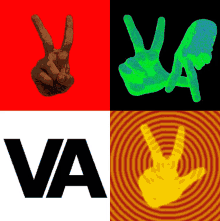

---



## **Part 3 - Strategic advice for market positioning in Virginia**

After providing these insights to our client, he asked us the following questions:


- Will my beer be a <b>unique</b> product in Virginia ? Are there beers <b>similar</b> to mine ? 


- What are the <b>most succesful</b> beers/breweries in Virginia? What is the aspect in which these beers excel (taste, palate) ?


- What <b>aspects of the beer profile</b> are most important (is taste more important than palate) ? 

First, we start by translating these business questions into questions we can answer using the data. We suggest the following questions as proxies for the business needs of our brewery:

### Problem statement:
- How do we find the beers that are similar to ours ? How do we even measure <i>closeness</i> of beers ?
- How do we know which aspect is <i>important</i> for a beer aspect ?
- How do you measure the success of a certain beer ?

### Suggested solutions:
- We need to represent beers in a space that has a notion of <b> distance </b>. If we can represent each beer as a vector, then we can run <b>clustering algorithms like `K-Means`</b> to find beers that are similar to each other. Or we can run <b> `K-Nearest Neighbours` </b> to find the beers that are most similar to ours. 
- On the same note, we can draw the <b> word-cloud </b> of the textual reviews associated to the beer, it will give the most commonly mentioned words. 
- For each beer we can run <b>`linear regression`</b> and compare the coefficients associated to each aspect. We start by learning a function $rating = w_1*palate + w_2*taste + w_3*aroma + w_4*appearance$. If $w_3$ is the biggest coefficient, then it is the most decisive aspect of the beer rating (i.e people care about the aroma aspect). 

- Measuring the success of a beer is simple, we just look at the proportion of high ratings. 

#### **Which beers are most similar to our products?**


The first part of our analysis involves comparing our client's beer to the reviews of Virginia to identify the most similar ones. To do this, we will represent each beer as a vector with four components: appearance, aroma, palate, and taste. These vectors will be generated by averaging the ratings of each component for all beer reviews in Virginia, and will be used to measure the similarity between beers using Euclidian distance. We will use a k-nearest neighbors (k-NN) algorithm to identify the "neighbors" of our client's beer, which will be considered the most similar ones. This will allow us to get a better understanding of the competition and how our client's beer compares to others in the market.

We start by creating the vector representation of a beer using the function below.

In [130]:
def vectorize(ratings_df):
  """ Returns dataframe of vectors, each representing the average reviews of a beer """
  columns_to_extract = ['beer_id', 'appearance', 'palate', 'taste', 'aroma']
  df_averaged = ratings_df.loc[:, columns_to_extract].groupby('beer_id').mean()
  return df_averaged

We then "vectorize" the reviews from Virginia.

In [131]:
vecs_v = vectorize(ratings_v)

As an example, we can look at a few vector representations.

In [132]:
vecs_v.head()

,appearance,palate,taste,aroma
beer_id,,,,
7839,3.297297,2.891892,6.270270,6.351351
7840,2.921053,2.894737,5.789474,5.763158
7841,3.500000,3.323529,6.911765,6.911765
14273,3.060606,2.848485,5.000000,4.969697
17741,3.500000,3.000000,7.000000,7.000000


Before using our vectors to analyze the similarity of beers, we would like to visualize them to see if there are any clusters or patterns in the data. However, since our vectors exist in a four-dimensional space, we need to apply a dimensionality reduction method in order to create a two-dimensional representation that we can plot. We have chosen to use principal component analysis (PCA) to reduce the dimensions of the beer vectors and create a planar representation. By running PCA on the beer vectors and plotting the resulting reduction, we hope to uncover any underlying structure or patterns in the data.

The code snippet below runs PCA on the vectors of each state separately and plot the resulting reduced vectors.

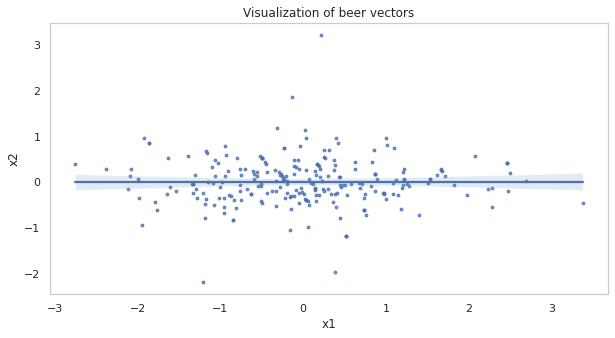

In [133]:
# Set up the plot
plt.figure(figsize=(10,5))

#Use PCA on beer vectors
pca = PCA(n_components=2)
beer_vecs_pca = pca.fit_transform(vecs_v)

# Plot the points with a regression line
sns.regplot(x=beer_vecs_pca[:,0], y=beer_vecs_pca[:,1], scatter_kws={'s':8})

#plt.axhline(y = 0, color =orange, linestyle = '--')
plt.xlabel('x1')
plt.ylabel('x2')

# Remove the grid
plt.grid(False)
plt.title('Visualization of beer vectors')

# Show the plot
plt.show()

The 2-dimensional PCA representation of the data appears to show a linear dependency between the values of the two axes, with points distributed around a regression line with a consistent variance. It appears that there may be sub-matching patterns present in the data, indicating that the beers in the ratings have similarities even though we cannot interpret the exact meanings of the values on the two axes. Overall, this suggests that the original data has a strong, predictable relationship between the variables and may be amenable to linear modeling techniques.

We now go back to finding the beers that are similar to our clients' beer using `k-NN`. We fit a `NearestNeighbors` object on the review vectors which is then used to find the neighbors of a particular beer input.

The cell below implements this process.

In [134]:
def find_knn(our_beer, k, vecs_v, data=np.asarray(vecs_v)):
    """
    Returns k-most similar beers to input our_beer
    
    Input: 
        - our_beer: beer_id 
        - k: (int) number of neighbors
    
    Output:
        - dataframe of neighbor ids, neighbor names and their associated beer_vec
    """
    knn = NearestNeighbors()
    knn.fit(data)
    neighbors = knn.kneighbors([our_beer], n_neighbors=k, return_distance=False)[0]
    neighbor_vecs = [data[i] for i in neighbors]
    neighbor_ids = [-1]
    neighbor_location = ['Beer Land']
    for vec in neighbor_vecs:
      for i in range(vecs_v.shape[0]):
          if np.allclose(vecs_v.iloc[i], vec):
            id_ = vecs_v.iloc[i].name
            neighbor_ids.append(id_)
            try:
              neighbor_location.append(beers_v.loc[beers_v.beer_id==id_].location.iloc[0])
            except IndexError:
              neighbor_location.append("N/A")
            break

    neighbor_names = []
    for id_ in neighbor_ids:
      if id_==-1:
        neighbor_names.append('Our Beer')
        continue
      try:
        name = beers_v.loc[beers_v.beer_id==id_].beer_name.iloc[0]
      except IndexError:
        name = 'N/A'
      neighbor_names.append(name)

    appearance = [our_beer[0]]+[profile[0] for profile in neighbor_vecs]
    aroma = [our_beer[1]]+[profile[1] for profile in neighbor_vecs]
    palate = [our_beer[2]]+[profile[2] for profile in neighbor_vecs]
    taste = [our_beer[3]]+[profile[3] for profile in neighbor_vecs]

    df = pd.DataFrame.from_dict({'neighbor_ids': neighbor_ids, 'neighbor_names': neighbor_names,
                                 'appearance': appearance, 'aroma': aroma, 
                                 'palate': palate, 'taste': taste})
    return df

We assume that our client has already gathered some reviews from his friends and family. So he gives us the vector representation below and asks us to find the most similar beers in Virginia. So we run our `k-NN` and we find the following 5 beers to be most similar to our client's.

In [135]:
our_beer = np.array([3, 2, 4.5, 0.5])
k = 5
neighbors = find_knn(our_beer, k, vecs_v)
neighbors

,neighbor_ids,neighbor_names,appearance,aroma,palate,taste
0,-1,Our Beer,3.000000,2.000000,4.500000,0.500000
1,52788,Founders India Pale Ale,3.000000,3.000000,4.333333,4.000000
2,32626,Williamsburg Irish Stout,3.000000,2.500000,5.000000,4.500000
3,80613,Blue & Gray Bormans Belgian Ale,2.666667,2.761905,4.904762,4.857143
4,56527,Blue & Gray Chocolate Raspberry Stout,3.666667,2.722222,5.000000,4.888889
5,47074,Williamsburg Colonial Mild,3.000000,2.000000,5.000000,5.000000


In [136]:
def plot_neighbor_ratings(neighbors):
  neighbors_plot = neighbors.drop(['neighbor_ids'], axis=1)
  neighbors_plot.set_index('neighbor_names', inplace=True)
  plt.figure(figsize=(10,6))
  neighbors_plot.plot.bar(figsize=(18,8), rot=0)
  plt.title('Ratings of our closest beers', fontsize=15)
  plt.ylabel('Rating')
  plt.xlabel('')

  plt.xticks(rotation=45)

  plt.show()

<Figure size 720x432 with 0 Axes>

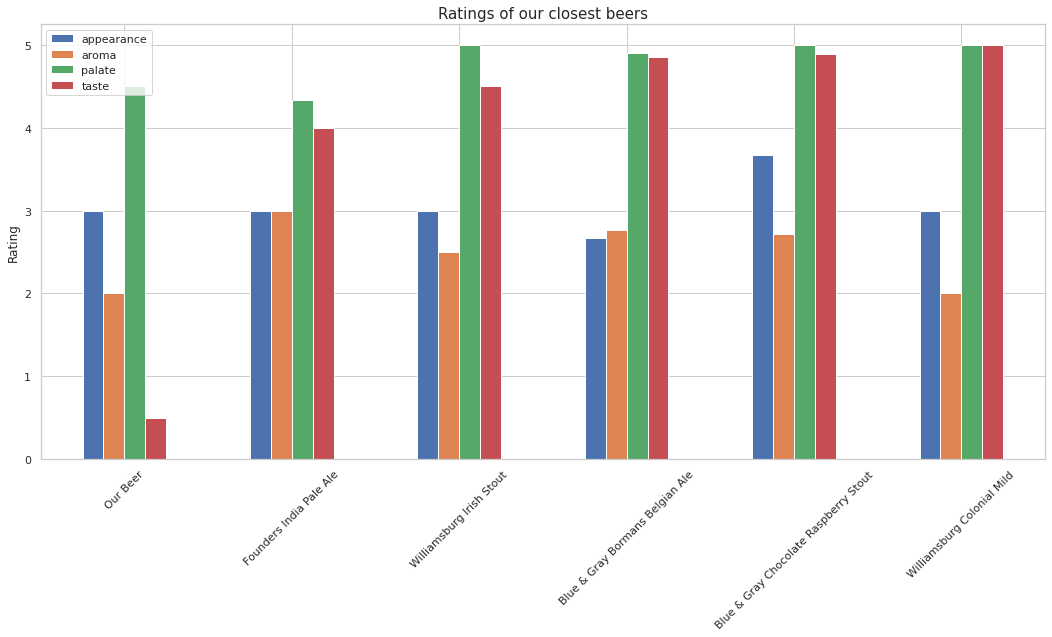

In [137]:
plot_neighbor_ratings(neighbors)

We see that our taste rating is the lowest compared to our closest competitors. On the other hand, the palate and appearance scores are relatively high. This enables us to pinpoint the problem to our client so they don't waste their resources on improving the appearance of their beer as it already rates high. Instead, they should develop other products that provide a different taste while keeping the same palate feel. 

Let's look at the overall ratings for the most similar beers to our product in order to determine if this type of product appeals to consumers in Virginia. 

In [138]:
#Retrieve the ids 
neighbor_ids = neighbors.neighbor_ids
#Retrieve ratings and style
neighbor_beers = ratings_v.loc[ratings_v['beer_id'].isin(neighbor_ids)]
ratings_avg = neighbor_beers.groupby('beer_id').rating.mean()

ratings_name_df = pd.DataFrame({'beer_id' : ratings_avg.index, 'rating' : ratings_avg.values})
ratings_name_df.merge(beers_v, how='inner', on='beer_id')[['beer_id', 'rating', 'beer_name', 'style']]

,beer_id,rating,beer_name,style
0,32626,2.800000,Williamsburg Irish Stout,Dry Stout
1,47074,2.500000,Williamsburg Colonial Mild,Mild Ale
2,52788,2.333333,Founders India Pale Ale,India Pale Ale (IPA)
3,56527,2.588889,Blue & Gray Chocolate Raspberry Stout,Sweet Stout
4,80613,2.504762,Blue & Gray Bormans Belgian Ale,Belgian Strong Ale


In [139]:
#Find average rating over the state 
print('Average rating for all beers in Virginia : {:.3f}/5'.format(np.mean(ratings_v.groupby('beer_id').rating.mean().values)))

Average rating for all beers in Virginia : 3.261/5


We can see that beers similar to our client's are not very well rated in general. Indeed, their average rating is lower than the average taken over all the beers rated in Virginia.

Our client must therefore offer other products in order to reach customers. 

### **Which features most influence the overall rating?**


In order to understand which features are most important to consumers and have the greatest influence on the overall rating of a product, we will use linear regression to identify the relative importance of each feature. By analyzing the coefficients of the linear regression model, we can determine which features have the most impact on the predicted outcome and are therefore considered the most important. This information can be used to guide the development of new products by focusing on the aspects that are most important to consumers.

In [140]:
def beer_feature_importance(beer_id, beers, ratings):
    """
    Returns list of weights when fitting the linear regression 
    """
    X = np.asarray(ratings[['appearance', 'aroma', 'palate', 'taste']])
    y = np.asarray(ratings.rating)
    clf = linear_model.LinearRegression(fit_intercept=False)
    clf.fit(X, y)
    weights = clf.coef_
    plt.figure(figsize = (8, 4))
    plt.bar(x = ['appearance', 'aroma', 'palate', 'taste'], height = weights, color=purple, alpha=0.4)
    plt.title('Influence of each feature in the ratings in Virginia', fontsize=15)
    plt.grid(False)
    plt.show()

    ols = sm.OLS(y, X)
    ols2 = ols.fit()
    return weights, ols2

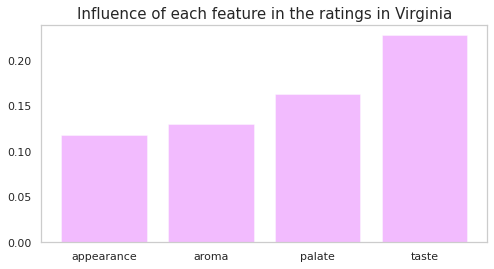

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.434e+05
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:15:02   Log-Likelihood:                          967.37
No. Observations:                2052   AIC:                                     -1927.
Df Residuals:                    2048   BIC:                                     -1904.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [141]:
weights, ols2 = beer_feature_importance(488341, beers_v, ratings_v)
print(ols2.summary())

All the coefficients obtained in the Linear Regression have a p-value equal to 0, meaning that they are significant in explaining the variation of the output variable. The taste score has the highest coefficient and thus has the biggest impact on the global rating. Appearance, on the other hand, has a coefficient that is only half as high and does not have as much influence on the consumers' score. 

When developing new beers, our client should then focus on taste and palate, and not on appearance as he did with its existing products. 


### **Which beer should you produce?**

Disappointed with the results on the potential ratings his beer could have in Virginia, our client asked us for advice on what type of beer he should produce instead. 

In response to out client's request, we proposed the following strategy: create a flagship product that would allow him to enter the market successfully but also to last over time. 


🤔 **But how do we define this product?** 

To define the flagship product, it is important to focus on creating a product that will attract and retain consumers. This means choosing a style of beer that is popular and well-liked by customers in Virginia, rather than trying to be too original or experimental. By selecting a style that is already rooted in the local market, our client's beer will have a higher chance of success because customers will be more familiar with and likely to seek out this type of beer. Additionally, by producing a beer that customers enjoy and want to repurchase, our client can build a loyal customer base and establish a lasting presence in the market.

#### **Which style should you chose ?** 

First, let's determine which styles are most popular in Virginia. 

In [149]:
def styles_by_state(beers, ratings) : 
  """Returns all the styles present in each state"""
  #Keep only the columns beer_id and style from beers dataset 
  beers_tmp = beers[['beer_id', 'style']]

  #Add style of the beer to the ratings dataset 
  ratings = ratings.merge(beers_tmp, how='inner', on='beer_id') 

  return ratings

def plot_word_cloud_styles(ratings, title):
    """Plot Wordcloud reporting the importance of each style"""
    # exctract textual reviews
    styles = ratings['style']

    word_could_dict=Counter(styles)
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_could_dict)
    # display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=20, y=1.08)

def create_counts_styles(ratings) : 
  """Create a DataFrame which contains the number of ratings per style"""
  ratings_tmp = ratings.groupby('style').beer_id.count()
  counts_styles_df = pd.DataFrame({'style' : ratings_tmp.index, 'counts' : ratings_tmp.values})
  counts_styles_df = counts_styles_df.sort_values('counts', ascending=False).head(5)
  return counts_styles_df

def barplot_styles(ratings, title) : 
  """Create a vertical barplot with the top 5 styles"""
  counts_styles_df = create_counts_styles(ratings)

  palette = sns.color_palette("pastel")
  sns.barplot(x="counts", y="style", data=counts_styles_df, palette = palette, label="Number of ratings")

  sns.despine(left=True, bottom=True)

  plt.tight_layout()
  plt.title(title)

def barplot_and_wordcloud(ratings, title_w, title_b) : 
  
  plt.figure(figsize=(20, 6))

  plt.subplot(1,2,1)
  plot_word_cloud_styles(ratings, title_w)

  plt.subplot(1,2,2)
  barplot_styles(ratings, title_b)

  plt.show()

#For each style we look at the evolution of the number of ratings over time 
def evolution_style(ratings) : 
  count_ratings_list = []

  #For each year
  for year in range(2007, 2017) :
    #Keep only the ratings from that year 
    df_tmp = ratings.loc[ratings['year']==year]
      
    #Group by the style and retrieve the number of ratings for this year
    count_rating = df_tmp.groupby('style').beer_id.count().to_dict()

    count_ratings_list.append(count_rating)
    
  return count_ratings_list

def plot_evolution(counts_ratings_df, green_list, red_list) : 
  fig, axs = plt.subplots(2, 5, figsize=(30,6), sharex=True, sharey=True)
  fig.suptitle('Evolution of the styles', fontsize=20)

  for i, elem in enumerate(counts_ratings_df.index):
      # Get the info on the plot
      row = i // 5
      col = i % 5
      subplot = axs[row, col]
      
      # Get the list of points
      counts_style = counts_ratings_df.iloc[i].values

      # Plot the evolution styles
      if elem in green_list : 
        subplot.plot(counts_ratings_df.columns, counts_style, color=green, marker = 'o')
      elif elem in red_list : 
        subplot.plot(counts_ratings_df.columns, counts_style, color=red, marker = 'o')
      else : 
        subplot.plot(counts_ratings_df.columns, counts_style, color=blue, marker = 'o')


      subplot.set_xticks([i for i in range(2007, 2017)])
      plt.setp(subplot.get_xticklabels(), rotation=45)
      subplot.set_title(elem, fontsize=10)
      subplot.grid(False)

  plt.show()

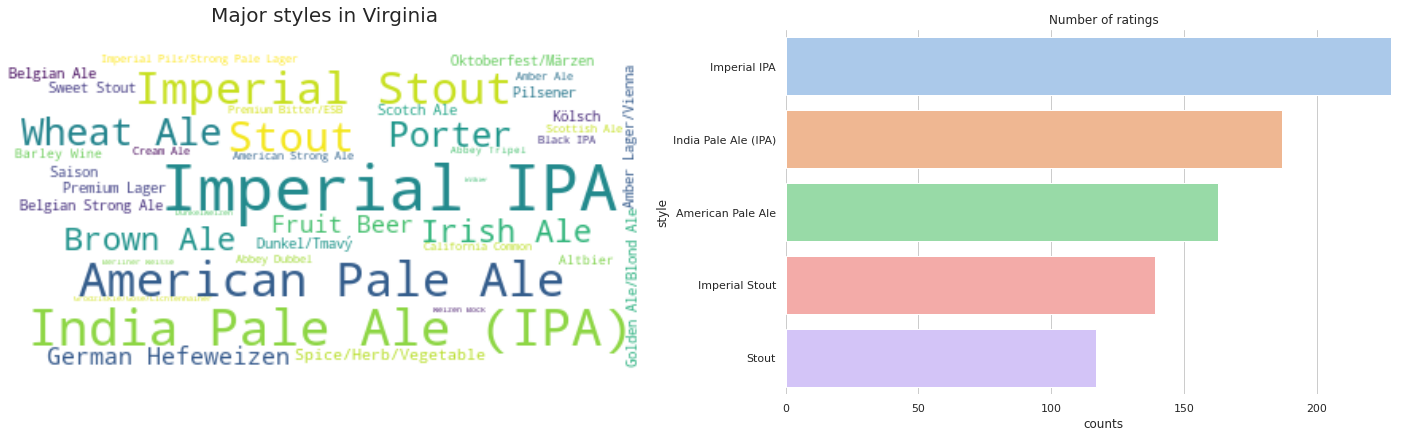

In [151]:
ratings_v = styles_by_state(beers_v, ratings_v)
barplot_and_wordcloud(ratings_v, 'Major styles in Virginia', 'Number of ratings')

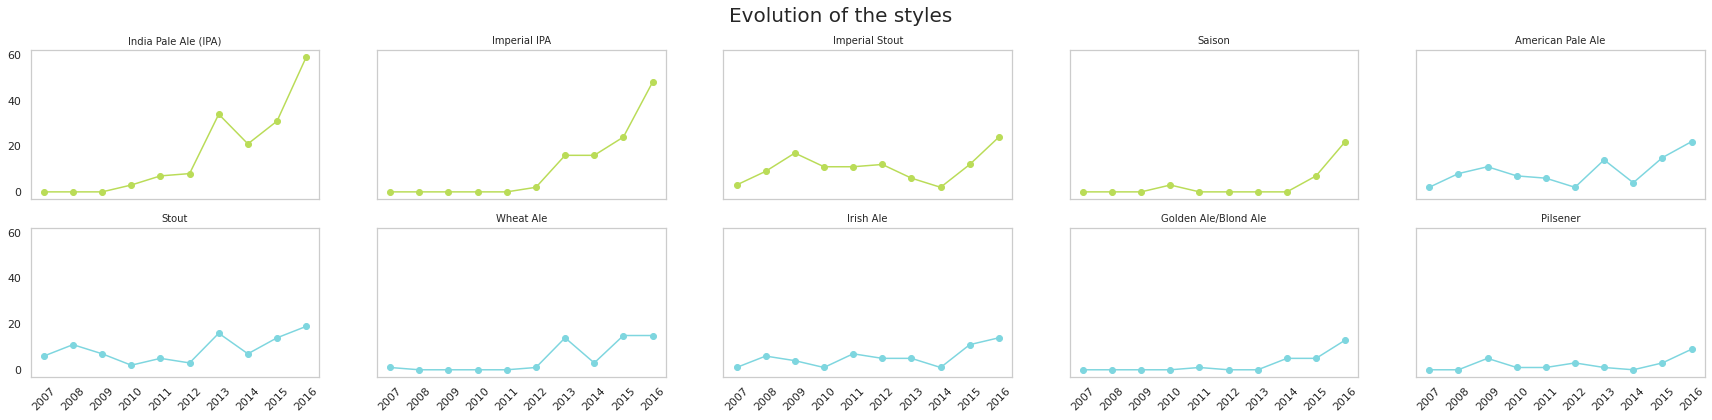

In [152]:
count_ratings_list_v = evolution_style(ratings_v)
counts_ratings_df_v = create_df_counts_per_state(count_ratings_list_v).sort_index().sort_values(2016, ascending=False).head(10)
plot_evolution(counts_ratings_df_v, ['India Pale Ale (IPA)', 'Imperial IPA', 'Saison', 'Imperial Stout'], [])

Imperial IPA is the most established style in Virginia with the highest number of ratings. India Pale Ale (IPA), on the other hand, has been growing very rapidly since 2014 and is becoming more and more popular in Virginia, even surpassing Imperial IPA in the number of ratings in 2016. 

Our client should therefore focus on the following styles:          
- **Imperial IPA**, (also known as double IPA) a long-standing favorite in Virginia 
- **India Pale Ale (IPA)**, (regular IPA) a style that has become increasingly popular in recent years.

#### **For each style, which are the most popular beers?**

Now that we have decided which style of beer to produce, we need to determine which beers are the most popular. This will tell us which beers we need to outperform and on which criterias we need to focus.

In [153]:
def most_popular_beer_per_style(beers_df, style, k):
    """We return the 3 most popular beers per style based on the number of ratings and the avg_rating"""
    beers_df = beers_df.loc[beers_df["style"] == style]
    beers_df['popularity'] = beers_df['avg']*beers_df['nbr_ratings']
    beers_df = beers_df.sort_values(by='popularity', ascending=False)
    return beers_df.iloc[:k][['beer_id', 'beer_name', 'style', 'popularity', 'avg', 'nbr_ratings']]

In [ ]:
top_india = most_popular_beer_per_style(beers_v, "India Pale Ale (IPA)", 3)
top_india

In [155]:
top_ipa = most_popular_beer_per_style(beers_v, "Imperial IPA", 3)
top_ipa

,beer_id,beer_name,style,popularity,avg,nbr_ratings
242359,486602,Stone (Richmond) / Ardent / Hardywood Give Me ...,Imperial IPA,292.41,3.61,81
238007,201088,Apocalypse Ale Works Hoppocalypse Imperial Red...,Imperial IPA,164.50,3.50,47
242361,469409,Stone (Richmond) Enjoy By IPA Unfiltered - Vir...,Imperial IPA,111.07,3.83,29


In the India Pale Ale (IPA) style, one particular beer stands out from the others due to its higher number of ratings and higher average rating. Additionally, all of the Imperial IPA beers have a higher average rating than the most popular IPA beer and a larger number of ratings, with the first one having particularly high ratings at 81. To understand why these beers are more popular and what sets them apart, we will need to analyze their characteristics (feature importance) and identify what makes them stand out in the market.

#### **Which characteristics make the top beers stand out?**

In this section, we will analyze the most popular beers to determine which features have the greatest influence on their ratings. By understanding which characteristics are most important to consumers, we can identify areas to focus on in order to maximize the rating of our client's beer and potentially surpass the competition. This information can be used to identify specific features that can be improved or emphasized in order to enhance the overall appeal and appeal of the beer.

In [156]:
def find_vectors_beer(beer_id) : 
    """Retrieve all the ratings for one beer and store the scores we are interested in"""
    to_extract = ['rating', 'beer_id', 'appearance', 'palate', 'taste', 'aroma']
    ratings_beer = ratings_v[ratings_v['beer_id'] == beer_id][to_extract]
    return ratings_beer

def top_beer_feature_importance(beers_per_style):
    """
    Returns list of weights when fitting the linear regression 
    """
    X = np.asarray(beers_per_style[['appearance', 'aroma', 'palate', 'taste']])
    y = np.asarray(beers_per_style.rating)
    clf = linear_model.LinearRegression(fit_intercept=False)
    clf.fit(X, y)
    weights = clf.coef_
    
    return weights

def plot_coef_per_style(ids,names, ipa) :
    """Plot weights for each beer"""
    weights_list = []
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(20, 4))
    for index, id in enumerate(ids) : 
      vectors_beer = find_vectors_beer(id)
      weights = top_beer_feature_importance(vectors_beer)
      weights_list.append(weights)
      if ipa : 
        axs[index].bar(x = ['appearance', 'aroma', 'palate', 'taste'], height = weights, color=purple, alpha=0.4)
      else : 
        axs[index].bar(x = ['appearance', 'aroma', 'palate', 'taste'], height = weights, color=blue, alpha=0.4)

      axs[index].set_title(names[index] + ' -  Number ' + str(index+1), fontsize=10)

      axs[index].grid(False)
    plt.show()
    return np.array(weights_list)

def compare_coefs(coefs,names):
  """Plot all the weights side by side to compare them"""
  weights_df = pd.DataFrame({'beer_name' : names,
                             'appearance' : coefs[:,0],
                             'aroma' : coefs[:,1],
                             'palate' : coefs[:,2],
                             'taste' : coefs[:,3]}, 
                             )
  weights_df.set_index('beer_name', inplace=True)

  weights_df.plot.bar(figsize=(12,6), rot=0)
  plt.title('Influence of each feature on ratings', fontsize=12)
  plt.ylabel('Rating')
  plt.xlabel('')

  plt.xticks(rotation=20)

  plt.show() 

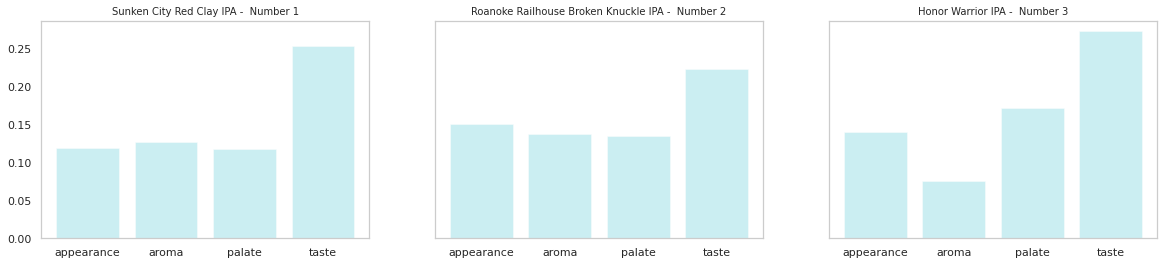

In [157]:
ids_india = top_india.beer_id.values
names_india = top_india.beer_name.values
weights_india = plot_coef_per_style(ids_india, names_india, 0)

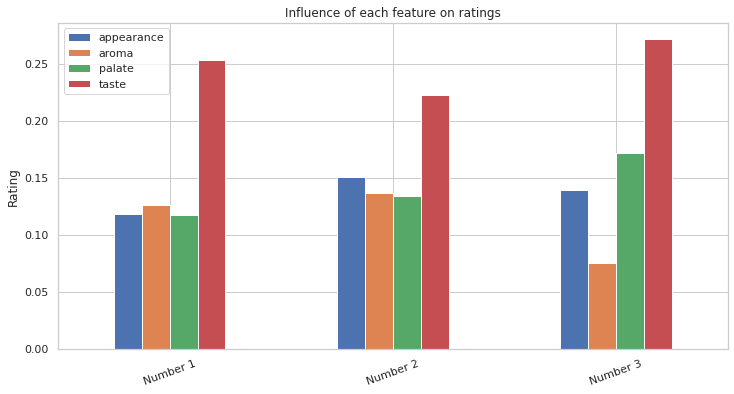

In [158]:
compare_coefs(weights_india, ['Number 1', 'Number 2', 'Number 3'])

Based on the plot, it appears that taste is the most influential factor on overall ratings for the popular beers of the regular IPA style. The three leading beers stand out from their competitors due to their high ratings in this category, rather than their appearance or palate, which our client may have thought were more important factors. This suggests that taste is a particularly important consideration for consumers when evaluating and rating beers, and that focusing on producing a beer with a highly rated taste may be crucial for success in the market.

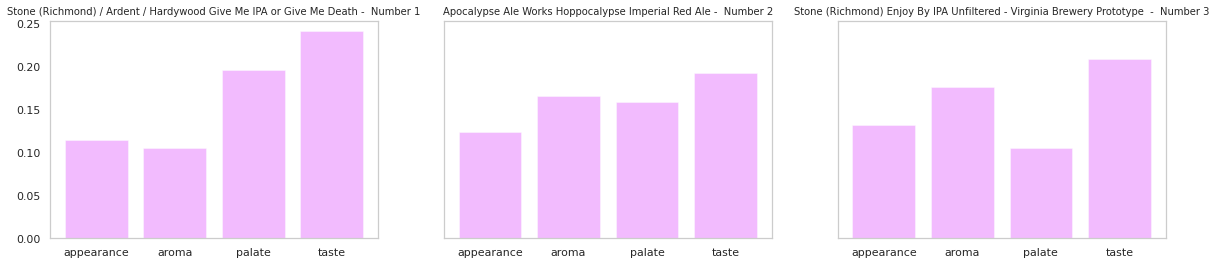

In [159]:
ids_ipa = top_ipa.beer_id.values
names_ipa = top_ipa.beer_name.values
weights_ipa = plot_coef_per_style(ids_ipa, names_ipa, 1)

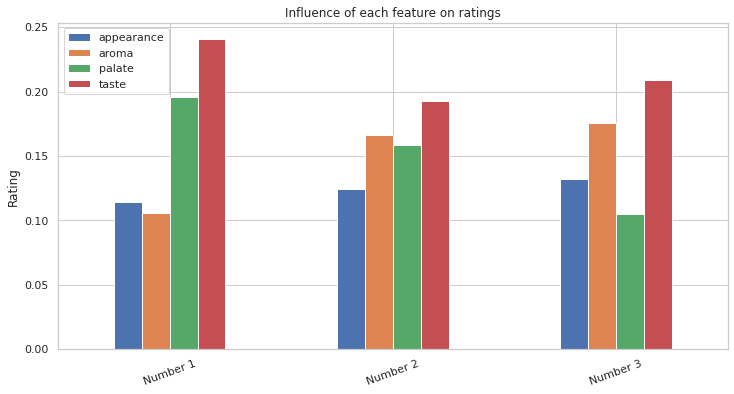

In [160]:
compare_coefs(weights_ipa, ['Number 1', 'Number 2', 'Number 3'])

For the Imperial IPA style, the analysis shows that the importance of the different characteristics is more evenly distributed. While taste is still the most influential factor, aroma and palate are close seconds and should also be taken into consideration when developing a beer in this style. This indicates that a well-rounded approach to producing a high-quality Imperial IPA, with a focus on all aspects of the beer including taste, aroma, and palate, may be necessary for success in this market.


**Conclusion of part 3**

Based on the analysis of the most popular beers in Virginia, it appears that taste is the most influential factor for both the India Pale Ale (IPA) and Imperial IPA styles. For the IPA style, taste is the primary characteristic that sets the leading beers apart from their competitors. For the Imperial IPA style, the importance of the different characteristics is more evenly distributed, with taste, aroma, and palate all being important factors.

Given these findings, we would advise our client to consider developing two beers – one regular IPA and one Imperial IPA – that prioritize these characteristics in their development. This could involve focusing on producing a beer with a particularly high-rated taste, as well as ensuring that the aroma and palate are well-balanced and appealing to consumers. By targeting these key aspects of the beer, our client can position themselves for success in the Virginia market and potentially surpass their competitors.

# **Conclusion**

Our client, Sam Smith, has decided to open a local brewery in the United States and has enlisted our consulting services to help him identify the best location and products for his business. Using data from RateBeer and BeerAdvocate, we have analyzed the beer market and determined that Virginia is the most promising state for Sam's brewery. Virginia has a rapidly growing number of users, a strong preference for local beers, and evenly distributed competition levels, making it an ideal location for Sam's business.


However, we want to caution Sam about the competitiveness of the beer market. Many new breweries only receive ratings for a short period of time, which can make it challenging to achieve long-term success. Therefore, we have performed an in-depth market analysis to provide Sam with the tools he needs to create a sustainable business.


We compared the reviews that Sam gathered on his first brews with the reviews of Virginian beers to identify specific competitors and analyze their characteristics. We found that the closest competitors significantly outperformed Sam's brews in terms of taste, which we determined to be the most important aspect based on feature importance analysis. While Sam's beer has a decent appearance and palate, it won’t be enough to compete with his competitors and establish a foothold in the Virginian beer market. As a result, we suggested new flagship products that incorporate the best features of the most successful beers in Virginia.


Our analysis of Virginia's consumer preferences shows that Sam should focus on creating beers with strong taste, particularly IPAs and Imperial IPAs, which are particularly popular in that state. These beers are known for their taste, which is the most important factor for Virginia's beer drinkers. By concentrating on creating tasty IPAs and Imperial IPAs, Sam's brewery can stand out in the crowded beer market and succeed.

